In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Terrorism Incidents from 2000 to (mid) 2014 (Preprocessing & Description Analyses)

Opening Dataset...

In [2]:
PATH = "D:/Program Files (x86)/Jupyter Projects/"
filepath = PATH + "deaths-in-india-satp-dfe.csv"
df = pd.read_csv(filepath)
df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,...,state_full,subject,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,total_number_of_people_gold,verb
0,711601341,False,finalized,1,4/30/15 8:54,0.0,3.0,1.0,4,1.0,...,Jammu and Kashmir,NaN,security,0.997059,not-assigned,0.991717,person,0.996510,NaN,killed
1,711601342,False,finalized,1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,...,Jammu and Kashmir,NaN,terrorist,0.979219,not-assigned,0.994222,person,0.986274,NaN,killed
2,711601343,False,finalized,1,4/30/15 8:35,0.0,1.0,0.0,1,1.0,...,NaN,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,NaN,arrested
3,711601344,False,finalized,1,4/30/15 9:12,NaN,7.0,NaN,7,1.0,...,Assam,NaN,terrorist,0.999999,not-assigned,1.000000,person,0.991712,NaN,surrendered
4,711601345,False,finalized,1,4/30/15 9:23,0.0,2.0,0.0,2,1.0,...,NaN,NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,NaN,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,712482465,False,finalized,1,5/5/15 13:45,0.0,4.0,0.0,4,1.0,...,Jharkhand,NaN,terrorist,1.000000,maoist,1.000000,person,0.999880,NaN,arrested
27229,712482476,False,finalized,1,5/5/15 6:23,0.0,1.0,0.0,1,1.0,...,Bihar,Left-wing extremists < fc > < be > < 8d > < b3...,terrorist,0.996965,maoist,0.999979,person,0.996917,NaN,killed
27230,712482485,False,finalized,1,5/5/15 13:08,0.0,1.0,0.0,1,1.0,...,Orissa,"the Security Force personnel ,",terrorist,0.998613,maoist,0.999966,person,0.999138,NaN,arrested
27231,712482493,False,finalized,1,5/5/15 5:48,0.0,1.0,0.0,1,1.0,...,Jammu and Kashmir,NaN,terrorist,0.995912,not-assigned,0.999995,person,0.990061,NaN,killed


Post-Descriptive Analysis Changes....

In [3]:
df['state_full'].iloc[np.where(df['state']=='CT')]

1770     NaN
2327     NaN
3455     NaN
3705     NaN
3706     NaN
        ... 
27132    NaN
27144    NaN
27151    NaN
27168    NaN
27169    NaN
Name: state_full, Length: 1008, dtype: object

In [ ]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

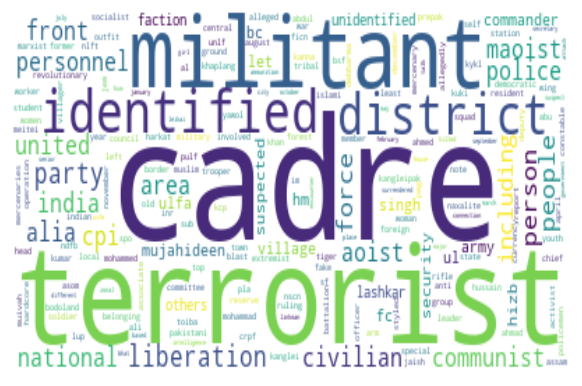

In [66]:
df['objectcleanpp'].fillna("0", inplace=True)
text = " ".join(sentence for sentence in df['objectcleanpp'])
wordcloud =  WordCloud(collocations = False, background_color ='white').generate(text)

fig, ax = plt.subplots(dpi=120)
ax.imshow(wordcloud, interpolation='bilinear', aspect='auto')
ax.axis("off")

(-0.5, 399.5, 199.5, -0.5)

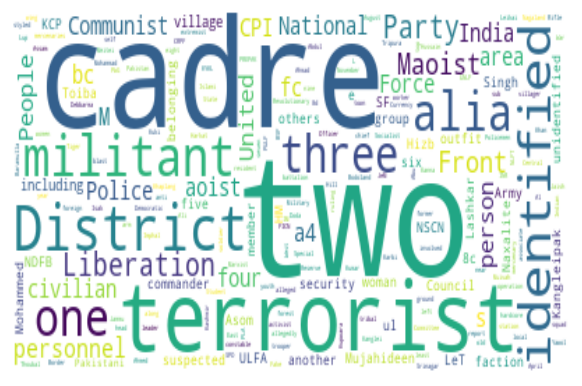

In [67]:
text = " ".join(sentence for sentence in df['object'])
wordcloud =  WordCloud(collocations = False, background_color ='white').generate(text)

fig, ax = plt.subplots(dpi=120)
ax.imshow(wordcloud, interpolation='bilinear', aspect='auto')
ax.axis("off")

Describing Dataset...

In [165]:
df.describe()

,_unit_id,_trusted_judgments,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,civilians_gold,eventid,militants_terrorists_insurgents_gold,objectcount,pid,rid,security_forces_gold,sid,srid,svmlabel1prob,svmlabel2prob,svmobjecttypeprob,total_number_of_people_gold
count,2.723300e+04,27233.0,24282.000000,25699.000000,23798.000000,27233.000000,27233.000000,0.0,27233.000000,0.0,2.723300e+04,27233.000000,27233.000000,0.0,27233.000000,27233.000000,27233.000000,27233.000000,27233.000000,0.0
mean,7.116156e+08,1.0,4.809818,3.964862,0.775779,8.590827,0.998692,NaN,141972.711269,NaN,6.642678e+02,57919.508721,30474.267690,NaN,141972.711269,349455.945471,0.897837,0.971690,0.990551,NaN
std,2.476014e+04,0.0,295.612457,151.737254,33.045042,373.181935,0.013046,NaN,105197.546973,NaN,2.217014e+04,41031.152489,20142.635124,NaN,105197.546973,267526.939892,0.133832,0.044158,0.015313,NaN
min,7.116013e+08,1.0,0.000000,0.000000,0.000000,0.000000,0.812500,NaN,3.000000,NaN,0.000000e+00,3.000000,2.000000,NaN,3.000000,7.000000,0.279684,0.506571,0.512891,NaN
25%,7.116082e+08,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,54556.000000,NaN,0.000000e+00,23174.000000,13732.000000,NaN,54556.000000,129943.000000,0.826750,0.963590,0.988152,NaN
50%,7.116150e+08,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,NaN,114737.000000,NaN,1.000000e+00,50069.000000,28266.000000,NaN,114737.000000,270363.000000,0.976318,0.988442,0.992452,NaN
75%,7.116218e+08,1.0,1.000000,2.000000,0.000000,3.000000,1.000000,NaN,227405.000000,NaN,3.000000e+00,90517.000000,46568.000000,NaN,227405.000000,562245.000000,0.995099,0.999979,0.996479,NaN
max,7.124825e+08,1.0,40000.000000,20647.000000,5024.000000,42147.000000,1.000000,NaN,360653.000000,NaN,2.300000e+06,142060.000000,69317.000000,NaN,360653.000000,921170.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
# Numerical data Seems to have alot of extreme values, as evident from the very low min, 25%, 50% and 75% values

Checking for relevant values across columns...

In [166]:
#single unqiue value and ids 
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

_unit_id : [711601341 711601342 711601343 ... 712482485 712482493 712482497]
_golden : [False]
_unit_state : ['finalized']
_trusted_judgments : [1]
_last_judgment_at : ['4/30/15 8:54' '4/30/15 9:41' '4/30/15 8:35' ... '5/5/15 9:09'
 '5/5/15 18:09' '5/5/15 5:40']
civilians : [0.0000e+00        nan 1.0000e+00 3.0000e+00 4.0000e+00 2.0000e+00
 5.0000e+00 7.0000e+00 1.1000e+01 1.0000e+01 6.0000e+00 1.4000e+01
 8.0000e+00 2.2000e+01 1.2000e+01 2.0000e+01 2.7000e+01 1.5000e+01
 3.0000e+01 9.0000e+00 1.7000e+01 4.5000e+01 1.6000e+01 4.0000e+01
 6.0000e+01 2.5000e+01 2.8000e+01 1.8000e+01 3.3000e+01 2.4000e+01
 1.3000e+01 3.6000e+01 7.0000e+01 2.9000e+01 2.1000e+01 2.3000e+01
 6.1000e+01 5.6000e+01 1.2300e+02 3.7000e+01 2.5000e+02 3.5000e+01
 3.2000e+01 1.9000e+01 3.8000e+01 1.0000e+02 2.6000e+02 3.4000e+01
 2.5700e+02 7.1300e+02 1.5300e+02 3.1000e+01 7.2000e+01 5.0000e+01
 2.6000e+01 1.5000e+02 5.2000e+01 5.8000e+01 5.0000e+02 5.0100e+02
 4.2000e+01 9.0000e+01 8.1000e+01 6.2000e+01 1.9000e+02

In [ ]:
#Checked unique values per column

In [167]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'civilians', 'militants_terrorists_insurgents',
       'security_forces', 'total_number_of_people', 'accuracy', 'canddist',
       'civilians_gold', 'date', 'districtmatch', 'eventid',
       'militants_terrorists_insurgents_gold', 'object', 'objectcleanpp',
       'objectcount', 'pid', 'report_date', 'rid', 'security_forces_gold',
       'sentence', 'sid', 'srid', 'state', 'state_full', 'subject',
       'svmlabel1', 'svmlabel1prob', 'svmlabel2', 'svmlabel2prob',
       'svmobjecttypelab', 'svmobjecttypeprob', 'total_number_of_people_gold',
       'verb'],
      dtype='object')

Dropping irrelevant columns...

In [ ]:
# Analysed the below mentioned columns - their values are not relevant towards analysis as they were either IDs or had single values throuoghout the column

In [3]:
names=['_unit_id','_unit_state','_golden','_trusted_judgments','civilians_gold','militants_terrorists_insurgents_gold','eventid','pid','rid','security_forces_gold','sid', 'srid','total_number_of_people_gold']
df.drop(columns=names, inplace=True)
df

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,canddist,date,districtmatch,object,...,state,state_full,subject,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,1.0,NaN,NaN,srinagar,three militants and one security forces personnel,...,JK,Jammu and Kashmir,NaN,security,0.997059,not-assigned,0.991717,person,0.996510,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,Baramulla,4-Mar,baramulla,Seven other militants,...,JK,Jammu and Kashmir,NaN,terrorist,0.979219,not-assigned,0.994222,person,0.986274,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,1.0,NaN,NaN,calcutta,A top Naga rebel and associate of National Soc...,...,NaN,NaN,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,arrested
3,4/30/15 9:12,NaN,7.0,NaN,7,1.0,Kamrup,Monday,kamrup,Seven militants of the Garo National Front ( G...,...,AS,Assam,NaN,terrorist,0.999999,not-assigned,1.000000,person,0.991712,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,1.0,Karimnagar,NaN,karimnagar,two suspected naxalites belonging to the PWG,...,NaN,NaN,NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,1.0,West Singhbhum,4-Feb,west singhbhum,Four Communist Party of India - Maoist ( CPI-M...,...,JH,Jharkhand,NaN,terrorist,1.000000,maoist,1.000000,person,0.999880,arrested
27229,5/5/15 6:23,0.0,1.0,0.0,1,1.0,Patna,18-Sep,patna,a supporter of the Communist Party of India ( ...,...,BR|JH,Bihar,Left-wing extremists < fc > < be > < 8d > < b3...,terrorist,0.996965,maoist,0.999979,person,0.996917,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1.0,Sundargarh,NaN,sundargarh,an armed Maoist cadre,...,OR,Orissa,"the Security Force personnel ,",terrorist,0.998613,maoist,0.999966,person,0.999138,arrested
27231,5/5/15 5:48,0.0,1.0,0.0,1,1.0,Ganderbal,NaN,ganderbal,a Pakistani militant of the LeT,...,JK,Jammu and Kashmir,NaN,terrorist,0.995912,not-assigned,0.999995,person,0.990061,killed


Dataset-post cleaning...

In [ ]:
# Saved a partially cleaned verison of the dataset and resumed working from there

In [3]:
filepath2 = PATH + "deaths satp cleaned.csv"
df2 = pd.read_csv(filepath2)
df2.drop(columns='Unnamed: 0', inplace=True)
df2

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,objectcount,report_date,sentence,state,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,1.0,4.0,3/7/00,"In an encounter at Khurhama, on the outskirts ...",JK,security,0.997059,not-assigned,0.991717,person,0.996510,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,7.0,3/7/00,Seven other militants were killed in separate ...,JK,terrorist,0.979219,not-assigned,0.994222,person,0.986274,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,1.0,0.0,3/7/00,A top Naga rebel and associate of National Soc...,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,arrested
3,4/30/15 9:12,NaN,7.0,NaN,7,1.0,7.0,3/7/00,Seven militants of the Garo National Front (GN...,AS,terrorist,0.999999,not-assigned,1.000000,person,0.991712,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,1.0,2.0,3/8/00,"In another incident, two suspected naxalites b...",NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,1.0,4.0,3/5/13,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,1.000000,maoist,1.000000,person,0.999880,arrested
27229,5/5/15 6:23,0.0,1.0,0.0,1,1.0,0.0,9/19/02,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,0.996965,maoist,0.999979,person,0.996917,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1.0,0.0,1/22/12,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,0.998613,maoist,0.999966,person,0.999138,arrested
27231,5/5/15 5:48,0.0,1.0,0.0,1,1.0,0.0,10/1/10,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,0.995912,not-assigned,0.999995,person,0.990061,killed


Checking columns with nans...

In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27233 entries, 0 to 27232
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _last_judgment_at                27233 non-null  object 
 1   civilians                        24282 non-null  float64
 2   militants_terrorists_insurgents  25699 non-null  float64
 3   security_forces                  23798 non-null  float64
 4   total_number_of_people           27233 non-null  int64  
 5   accuracy                         27233 non-null  float64
 6   objectcount                      27233 non-null  float64
 7   report_date                      27233 non-null  object 
 8   sentence                         27233 non-null  object 
 9   state                            22476 non-null  object 
 10  svmlabel1                        27233 non-null  object 
 11  svmlabel1prob                    27233 non-null  float64
 12  svmlabel2         

Checking svmlabel2 distribution...

In [ ]:
# the svmlabel2 column indicates whether the incident is maoist related or not

In [7]:
i = np.where(df['svmlabel2']=='maoist')
df['svmlabel2'].iloc[i].value_counts()

maoist    3041
Name: svmlabel2, dtype: int64

Cleaning verb column...

In [ ]:
# the verb column uses extremely similar verbs to describe the same outcome - after finding their values from unique values in the respective column, we
# replace the words with the same meaning to make categorical/label-based analysis easier

In [4]:
def clean_condition(row):
    killed = ['killed', 'killing', 'kill', 'kills']
    injured = ['injured', 'injure', 'injuring', 'wounded', 'wounding']
    surrendered = ['surrendered', 'arrested', 'arrest', 'arresting', 'surrender', 'surrendering']
    
    if row['verb'] in killed:
        return 'killed'
    if row['verb'] in injured:
        return 'injured'
    if row['verb'] in surrendered:
        return 'surrendered'
    return row['verb']

def clean_df(frame):
    df_cleaned = df2.copy()
    df_cleaned['verb'] = df_cleaned.apply(lambda x:clean_condition(x), axis=1)
    return df_cleaned

df_cleaned = clean_df(df2)
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,objectcount,report_date,sentence,state,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,1.0,4.0,3/7/00,"In an encounter at Khurhama, on the outskirts ...",JK,security,0.997059,not-assigned,0.991717,person,0.996510,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,7.0,3/7/00,Seven other militants were killed in separate ...,JK,terrorist,0.979219,not-assigned,0.994222,person,0.986274,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,1.0,0.0,3/7/00,A top Naga rebel and associate of National Soc...,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,surrendered
3,4/30/15 9:12,NaN,7.0,NaN,7,1.0,7.0,3/7/00,Seven militants of the Garo National Front (GN...,AS,terrorist,0.999999,not-assigned,1.000000,person,0.991712,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,1.0,2.0,3/8/00,"In another incident, two suspected naxalites b...",NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,1.0,4.0,3/5/13,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,1.000000,maoist,1.000000,person,0.999880,surrendered
27229,5/5/15 6:23,0.0,1.0,0.0,1,1.0,0.0,9/19/02,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,0.996965,maoist,0.999979,person,0.996917,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1.0,0.0,1/22/12,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,0.998613,maoist,0.999966,person,0.999138,surrendered
27231,5/5/15 5:48,0.0,1.0,0.0,1,1.0,0.0,10/1/10,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,0.995912,not-assigned,0.999995,person,0.990061,killed


Filling NaNs...

In [ ]:
# The NaN values remaining are in the civilians, terrorists and security forces columns. With a few exceptions (which will be highlighted later),
# these 3 column values always add up to total people involved. Thus replacing with 0s ensures this summation stays accurate, making it our 
# choice to fill with instead of mean/median/mode

In [5]:
df_cleaned.fillna(0, inplace=True)
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,objectcount,report_date,sentence,state,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,1.0,4.0,3/7/00,"In an encounter at Khurhama, on the outskirts ...",JK,security,0.997059,not-assigned,0.991717,person,0.996510,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,7.0,3/7/00,Seven other militants were killed in separate ...,JK,terrorist,0.979219,not-assigned,0.994222,person,0.986274,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,1.0,0.0,3/7/00,A top Naga rebel and associate of National Soc...,0,terrorist,0.948564,not-assigned,0.990548,person,0.996909,surrendered
3,4/30/15 9:12,0.0,7.0,0.0,7,1.0,7.0,3/7/00,Seven militants of the Garo National Front (GN...,AS,terrorist,0.999999,not-assigned,1.000000,person,0.991712,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,1.0,2.0,3/8/00,"In another incident, two suspected naxalites b...",0,terrorist,0.858030,maoist,0.914427,person,0.987609,killed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,1.0,4.0,3/5/13,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,1.000000,maoist,1.000000,person,0.999880,surrendered
27229,5/5/15 6:23,0.0,1.0,0.0,1,1.0,0.0,9/19/02,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,0.996965,maoist,0.999979,person,0.996917,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1.0,0.0,1/22/12,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,0.998613,maoist,0.999966,person,0.999138,surrendered
27231,5/5/15 5:48,0.0,1.0,0.0,1,1.0,0.0,10/1/10,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,0.995912,not-assigned,0.999995,person,0.990061,killed


In [6]:
corr = df_cleaned.corr() #checks correlation among the numerical and categorical values
corr

,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,objectcount,svmlabel1prob,svmlabel2prob,svmobjecttypeprob
civilians,1.000000,0.303336,0.352904,0.897009,0.000957,0.016846,-0.009883,-0.002813,-0.002446
militants_terrorists_insurgents,0.303336,1.000000,0.836759,0.691118,0.001282,0.015496,0.006752,0.007792,0.000749
security_forces,0.352904,0.836759,1.000000,0.677053,0.001283,0.016279,0.002804,-0.006570,0.001048
total_number_of_people,0.897009,0.691118,0.677053,1.000000,0.001326,0.020077,-0.004413,0.000477,-0.001387
accuracy,0.000957,0.001282,0.001283,0.001326,1.000000,-0.011731,0.031646,0.021595,0.002803
objectcount,0.016846,0.015496,0.016279,0.020077,-0.011731,1.000000,-0.007557,-0.003575,0.002675
svmlabel1prob,-0.009883,0.006752,0.002804,-0.004413,0.031646,-0.007557,1.000000,0.209813,0.192783
svmlabel2prob,-0.002813,0.007792,-0.006570,0.000477,0.021595,-0.003575,0.209813,1.000000,0.107577
svmobjecttypeprob,-0.002446,0.000749,0.001048,-0.001387,0.002803,0.002675,0.192783,0.107577,1.000000


In [6]:
import seaborn as sns

<AxesSubplot:>

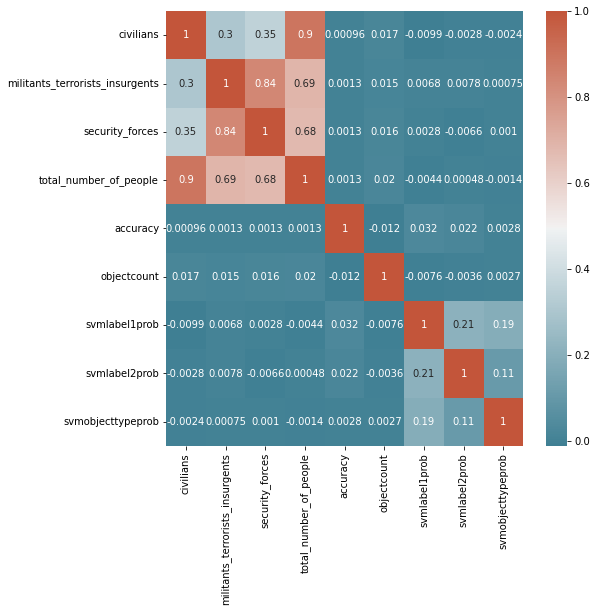

In [207]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True)) #visualizes the correlation better

Dropping more columns...

In [ ]:
# further analsyis of the columns leads us to dropping those we considered difficult to glean info from (at this current point in time)

# Later on the we realize objectcount is removing numbers from the sentence column and saving the purely descriptive text in the previously dropped 
# objectcleanpp, which we discovered when we were doing a wordcloud analysis on the sentence column 

# Similarly, the svmlabel2 column gives information whether the incident is maoist related on not, which is incorrectly dropped at this point
# but is reintroduced later and analysed

In [6]:
names = ['accuracy','svmlabel1prob','svmlabel2prob','svmobjecttypeprob','svmlabel2','objectcount']
df_cleaned.drop(columns=names,inplace=True)
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,svmlabel1,svmobjecttypelab,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,3/7/00,"In an encounter at Khurhama, on the outskirts ...",JK,security,person,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,3/7/00,Seven other militants were killed in separate ...,JK,terrorist,person,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,3/7/00,A top Naga rebel and associate of National Soc...,0,terrorist,person,surrendered
3,4/30/15 9:12,0.0,7.0,0.0,7,3/7/00,Seven militants of the Garo National Front (GN...,AS,terrorist,person,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,3/8/00,"In another incident, two suspected naxalites b...",0,terrorist,person,killed
...,...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,3/5/13,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,person,surrendered
27229,5/5/15 6:23,0.0,1.0,0.0,1,9/19/02,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,person,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1/22/12,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,person,surrendered
27231,5/5/15 5:48,0.0,1.0,0.0,1,10/1/10,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,person,killed


In [209]:
df_cleaned['svmobjecttypelab'].unique()

array(['person', 'asset/ infrastructure'], dtype=object)

In [180]:
df_cleaned['svmlabel1'].unique()

array(['security', 'terrorist', 'civilian', 'public', 'private'],
      dtype=object)

In [12]:
i = np.where(df_cleaned['svmobjecttypelab']=='asset/ infrastructure')
df3 = df['svmlabel1'].iloc[i]
df3.value_counts()

terrorist    14
civilian      5
private       4
Name: svmlabel1, dtype: int64

In [ ]:
# At this point we also discover that svmobjecttypelab has over over 99% of the data pertaining to category - person, hence we drop the column later as the other category has
# too few values to properly differentiate and analyse 

Checking if states affect incident outcomes...

In [ ]:
# The start of descriptive analysis, performing chi-square test to idenitfy if the state signficantly affects whether civlians/terrorists/security forces
# are either killed, injured or surrender

In [8]:
contingency_states_vs_verb = pd.crosstab(df_cleaned['state'],df_cleaned['verb'])
contingency_states_vs_verb

verb,injured,killed,surrendered
state,,,
0,769,2456,1532
AP,81,604,528
AR,6,25,61
AS,411,1123,1845
AS|MN,12,16,17
BR|JH,83,231,502
CT,153,536,319
CT|MP,2,4,42
GJ,2,4,47


In [9]:
from scipy.stats import chi2_contingency

c, p, dof, expected  = chi2_contingency(contingency_states_vs_verb)
c, p, dof

(4009.2407598533177, 0.0, 48)

In [ ]:
# The P-value is rounded to 0, thus we can see that the outcome of the incident (killed/injured/surrendered) does infact get influenced
# by which state it occurs in

Checking if target affects total number of people involved...

In [ ]:
# t-test perform to check if the either people or assets targeted significantly affects the total people involved

In [184]:
a = np.where(df_cleaned['svmobjecttypelab']=='person')
b = np.where(df_cleaned['svmobjecttypelab']=='asset/ infrastructure')

group_A = df_cleaned['total_number_of_people'].iloc[a]
group_B = df_cleaned['total_number_of_people'].iloc[b]

group_A

0        4
1        7
2        1
3        7
4        2
        ..
27228    4
27229    1
27230    1
27231    1
27232    1
Name: total_number_of_people, Length: 27210, dtype: int64

In [185]:
from scipy.stats import ttest_ind

ttest_ind(group_A,group_B)

Ttest_indResult(statistic=0.051195812339062174, pvalue=0.9591698642458122)

In [ ]:
# As expected, due to the lack of data of one group, the results were not significant

Checking if states affect total casualties...

In [ ]:
# Early attempt at performing anova test between total people involved and the state
# Stopped partway through as results were not as expected 

In [186]:
k = [df_cleaned['total_number_of_people'].iloc[np.where(df['state']==x)] for x in df_cleaned['state'].unique()]

from scipy.stats import f_oneway

f_oneway(k[0].values, k[1].values, k[2].values, k[3].values, k[4].values, k[5].values, k[6].values, k[7].values, k[8].values, k[9].values, k[10].values, k[11].values)

D:\Program Files (x86)\Python\lib\site-packages\scipy\stats\_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
# Taking a step back, outlier check was performed with box plots, upon which we discovered that there was a huge
# skew in the numerical data - even though the numerical data went up to the 40,000s numbers above 8 were considered
# as outliers

# The reason for this will be explained shortly after

(0.0, 10.0)

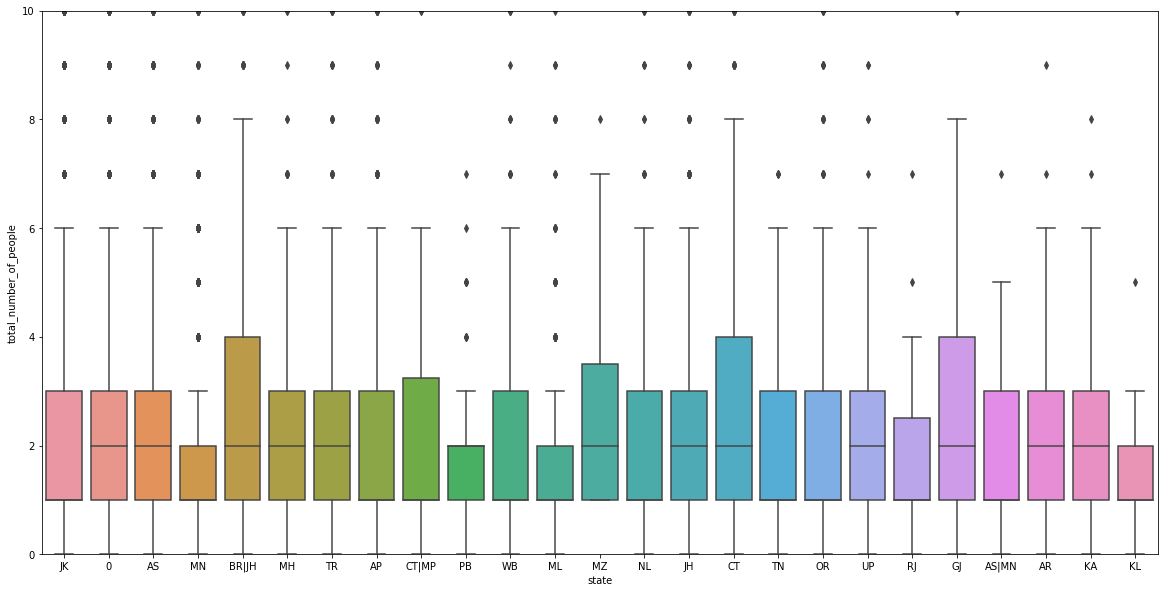

In [210]:
anova_df = df_cleaned[['state','total_number_of_people']].copy()
anova_df

plt.figure(figsize=(20,10))
ax = sns.boxplot(x='state',y='total_number_of_people',data=anova_df)
# ax = sns.swarmplot(x='state',y='total_number_of_people',data=anova_df)
# plt.show()
ax.set_ylim([0,10]) 

In [188]:
df_cleaned['total_number_of_people'].sort_values()

4863         0
25917        0
13056        0
25894        0
10746        0
         ...  
14846     4000
99       11000
18830    15589
21747    40000
13625    42147
Name: total_number_of_people, Length: 27233, dtype: int64

In [ ]:
# Manual anova test, with outliers included hence results were poor

In [189]:
from scipy.stats import f

In [190]:
category = 'state'
numbers = 'total_number_of_people'

n = df_cleaned.groupby(category).size()[0]
N = len(df_cleaned.values)
k = len(pd.unique(df_cleaned[category]))

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

SSbetween = (sum(df_cleaned.groupby(category).sum()[numbers]**2)/n) \
    - (df_cleaned['total_number_of_people'].sum()**2)/N

sum_y_squared = sum([value**2 for value in df_cleaned[numbers].values])

SSwithin = sum_y_squared - sum(df_cleaned.groupby(category).sum()[numbers]**2)/n

SStotal = sum_y_squared - (df_cleaned[numbers].sum()**2)/N

MSbetween = SSbetween/DFbetween

MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin

p = f.sf(F, DFbetween, DFwithin)

eta_sqrd = SSbetween/SStotal

om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

print(F)
print(p)
print(eta_sqrd)
print(om_sqrd)

0.7493215671663458
0.8037332867460418
0.0006605350902475917
-0.00022096764189549292


In [ ]:
# the p-value was 0.8, hence the results were insignificant - however the test was used at an incorrect point in time
# as we still had not analysed the outliers yet

Dropping svmobjecttypelab column due to over 99% 1 type of data...

In [ ]:
# At this point only one of the columns are renamed appropriately, once we became confident in our processed data did we rename all columns
# As for the dropped column, it is as mentioned earlier - overwhelmingly 1 type of category, the 2nd type might as well not exist statsitically 

In [7]:
df_cleaned.drop(columns='svmobjecttypelab', inplace=True)
df_cleaned.rename(columns={'svmlabel1':'target'},inplace=True)
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb
0,4/30/15 8:54,0.0,3.0,1.0,4,3/7/00,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed
1,4/30/15 9:41,0.0,7.0,0.0,7,3/7/00,Seven other militants were killed in separate ...,JK,terrorist,killed
2,4/30/15 8:35,0.0,1.0,0.0,1,3/7/00,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered
3,4/30/15 9:12,0.0,7.0,0.0,7,3/7/00,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered
4,4/30/15 9:23,0.0,2.0,0.0,2,3/8/00,"In another incident, two suspected naxalites b...",0,terrorist,killed
...,...,...,...,...,...,...,...,...,...,...
27228,5/5/15 13:45,0.0,4.0,0.0,4,3/5/13,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered
27229,5/5/15 6:23,0.0,1.0,0.0,1,9/19/02,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed
27230,5/5/15 13:08,0.0,1.0,0.0,1,1/22/12,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered
27231,5/5/15 5:48,0.0,1.0,0.0,1,10/1/10,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed


Generating histograms for numerical data...

In [213]:
df_cleaned['total_number_of_people'].sort_values()[:]

4863         0
25917        0
13056        0
25894        0
10746        0
         ...  
14846     4000
99       11000
18830    15589
21747    40000
13625    42147
Name: total_number_of_people, Length: 27233, dtype: int64

(array([  446., 13584.,  5646.,  2564.,  1435.,   843.,   598.,   385.,
          229.,   345.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

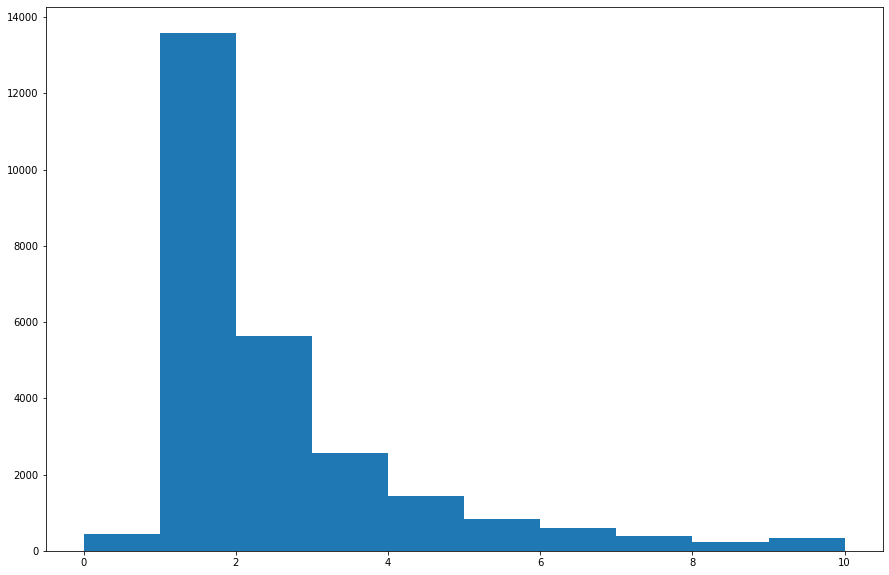

In [214]:
plt.hist(df_cleaned['total_number_of_people'], range=[0,10])

In [ ]:
# By limiting the range to 10, we see that out of the 27,000 data points, roughly 26,000 are incidents that has people involved in the range of 0 to 10, with half
# of those incidents (14,000) having only 1 person involved

<AxesSubplot:ylabel='Density'>

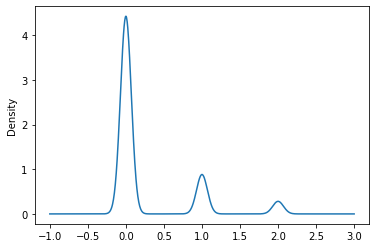

In [ ]:
df_cleaned['civilians'].sort_values()[:25000].plot.kde()

Checking if targets are significantly affected by the states...

In [ ]:
# Another chi square test to check if the states significantly affect the type of person (civilians/security forces/terrorists)
# that are either killed, injured or surrender

In [ ]:
contingency_state_vs_target = pd.crosstab(df_cleaned['state'],df_cleaned['target'])
contingency_state_vs_target


target,civilian,private,public,security,terrorist
state,,,,,
0,2195,7,8,735,1812
AP,468,1,4,139,601
AR,14,0,0,3,75
AS,1101,1,14,222,2041
AS|MN,10,0,0,17,18
BR|JH,280,3,3,100,430
CT,317,1,6,235,449
CT|MP,25,2,0,3,18
GJ,36,0,0,1,16


In [ ]:
c, p, dof, expected = chi2_contingency(contingency_state_vs_target)
c, p, dof

(1905.7237055862179, 0.0, 96)

In [ ]:
# Once again, since the p-value is rounded down to 0, we find that the states do indeed influence the type of person
# involved

Checking if the target affects the outcome...

In [ ]:
# Another chi square test but despite it's significance the findings aren't particularly relevant

In [ ]:
contingency_target_vs_verb = pd.crosstab(df_cleaned['target'],df_cleaned['verb'])
contingency_target_vs_verb

verb,injured,killed,surrendered
target,,,
civilian,2574,3937,3247
private,10,12,32
public,15,32,29
security,1268,1845,451
terrorist,233,5565,7983


In [ ]:
c, p, dof, expected = chi2_contingency(contingency_target_vs_verb)
c, p, dof

(5256.746360194087, 0.0, 8)

Converting date columns to appropriate datetime type...

In [ ]:
# More data processing, to test if the difference in last judgement at column and report date are meaningful or not

In [8]:
date1 = '_last_judgment_at'
date2 = 'report_date'

df_cleaned[date1] = pd.to_datetime(df_cleaned[date1])
df_cleaned[date2] = pd.to_datetime(df_cleaned[date2])
df_cleaned['yeardiffs'] = (df_cleaned[date1] - df_cleaned[date2])/np.timedelta64(1,'Y')
df_cleaned.sort_values(by='yeardiffs')

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs
27176,2015-05-04 19:15:00,0.0,1.0,0.0,1,2014-05-18,Acting on a tip-off provided by the Bihar Poli...,UP,civilian,surrendered,0.963201
27178,2015-05-05 12:31:00,0.0,1.0,0.0,1,2014-05-18,"Meanwhile, an armed individual was arrested by...",NL,civilian,surrendered,0.965171
27173,2015-05-04 17:56:00,1.0,0.0,0.0,1,2014-05-17,"Meanwhile, a minor boy, identified as Biraj Br...",0,civilian,injured,0.965789
27177,2015-05-06 00:12:00,0.0,1.0,0.0,1,2014-05-18,Nagaland Post reports on May 17 that a <fc><be...,NL,civilian,surrendered,0.966504
27175,2015-05-05 13:51:00,0.0,1.0,0.0,1,2014-05-17,He was arrested for allegedly setting ablaze a...,ML,private,surrendered,0.968061
...,...,...,...,...,...,...,...,...,...,...,...
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",0,terrorist,killed,15.144434
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered,15.147081
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151


Checking relations when total involvement are less than 10...

In [ ]:
# A preliminary check to identify the total data points that have less than 10 total people involved

In [9]:
i = np.where(df_cleaned['total_number_of_people'] <= 10)
df_cleaned.iloc[i]

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered,15.147081
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",0,terrorist,killed,15.144434
...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132


In [11]:
df_cleaned.iloc[i].describe()

,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,yeardiffs
count,26075.000000,26075.000000,26075.000000,26075.000000,26075.000000
mean,0.534036,1.304084,0.323682,2.067383,8.167162
std,1.333632,1.590437,1.081551,1.728955,4.144017
min,0.000000,0.000000,0.000000,0.000000,0.963201
25%,0.000000,0.000000,0.000000,1.000000,4.653561
50%,0.000000,1.000000,0.000000,1.000000,8.128532
75%,1.000000,2.000000,0.000000,2.000000,11.881259
max,50.000000,21.000000,59.000000,10.000000,15.147206


In [ ]:
# An anomaly is noticed - even though the totals sum up to 10, certain data points exceed 10
# which is not mathematically accurate

In [12]:
df_cleaned.iloc[i].sort_values(by="civilians")

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117
16965,2015-05-05 08:49:00,0.0,0.0,1.0,1,2009-03-21,"A class nine student, identified as Surju Nare...",CT,civilian,killed,6.122966
16964,2015-05-05 04:09:00,0.0,3.0,0.0,3,2009-03-21,"However, another Police official in Tirap Dist...",AR,civilian,injured,6.122433
16963,2015-05-05 05:50:00,0.0,3.0,0.0,3,2009-03-21,"However, another Police official in Tirap Dist...",AR,terrorist,killed,6.122626
16962,2015-05-04 17:26:00,0.0,2.0,0.0,2,2009-03-21,Two National Socialist Council of Nagaland-Isa...,AR,civilian,injured,6.121211
...,...,...,...,...,...,...,...,...,...,...,...
10325,2015-04-30 13:38:00,11.0,1.0,1.0,1,2005-05-16,"In another incident, the Imphal West district ...",MN,terrorist,surrendered,9.956585
9678,2015-04-30 18:35:00,12.0,0.0,0.0,1,2005-01-01,"Earlier, on December 30, security forces' arre...",AS,terrorist,surrendered,10.326767
19227,2015-05-06 02:17:00,12.0,0.0,0.0,1,2010-05-15,One supporter of the ruling Communist Party of...,WB,terrorist,killed,4.975038
10660,2015-04-30 22:18:00,42.0,0.0,3.0,7,2005-07-16,"Further, seven persons, including a retired po...",JK,security,injured,9.790562


In [219]:
df_cleaned['sentence'][10325]

'In another incident, the Imphal West district police arrested a United National Liberation Front (UNLF) cadre from Lamboikhongnangkhong on May 15.'

In [ ]:
# upon checking row 10325, 9678, 19227, 10660 and 15896 we notice that the civilian column numbers were entered incorrectly

Generating new heatmap....

In [ ]:
# An invalid check as certain anomalous data has not been removed

In [10]:
corr2 = df_cleaned.iloc[i].corr()
corr2

,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,yeardiffs
civilians,1.000000,-0.235268,0.010788,0.386997,0.033858
militants_terrorists_insurgents,-0.235268,1.000000,-0.144623,0.580095,-0.030648
security_forces,0.010788,-0.144623,1.000000,0.320636,0.095084
total_number_of_people,0.386997,0.580095,0.320636,1.000000,0.033190
yeardiffs,0.033858,-0.030648,0.095084,0.033190,1.000000


<AxesSubplot:>

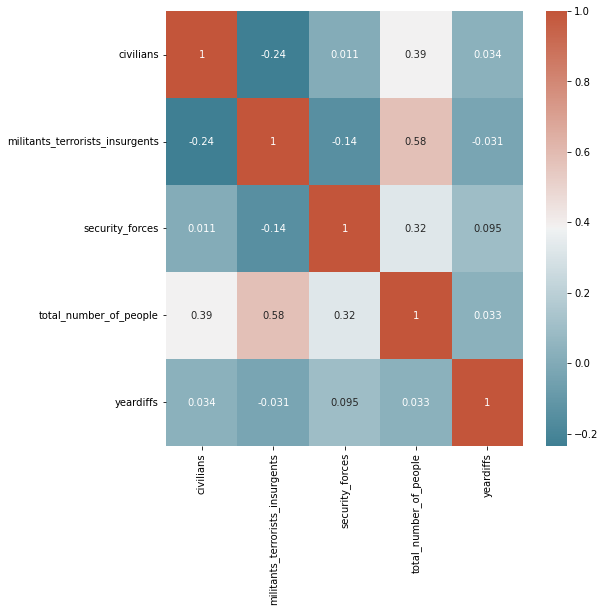

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr2, xticklabels=corr2.columns, yticklabels=corr2.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

In [ ]:
# Now we check the totals for all data points to figure out why so many data points for total people involved
# are considered outliers

In [222]:
df_cleaned.sort_values(by='civilians')

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117
16908,2015-05-06 04:19:00,0.0,1.0,0.0,1,2009-03-09,"Further, a People''s Liberation Army (PLA) mil...",MN,terrorist,surrendered,6.158045
16907,2015-05-05 17:28:00,0.0,2.0,0.0,2,2009-03-09,"Separately, two People''s Revolutionary Party ...",MN,terrorist,surrendered,6.156808
16906,2015-05-05 17:07:00,0.0,1.0,0.0,1,2009-03-09,"Elsewhere in the State, the Army arrested a Mu...",AS,terrorist,surrendered,6.156768
16904,2015-05-05 19:47:00,0.0,3.0,0.0,3,2009-03-09,Three cadres of the erstwhile Jharkhand Libera...,JH,terrorist,killed,6.157072
...,...,...,...,...,...,...,...,...,...,...,...
21748,2015-05-05 18:11:00,918.0,0.0,0.0,918,2011-08-11,Union Minister of State for Home Affairs Jiten...,JK,civilian,killed,3.733842
17831,2015-05-05 05:50:00,1002.0,0.0,0.0,1002,2009-09-18,"Later, the Hazaribagh Police in collaboration ...",JH,civilian,surrendered,5.627064
18830,2015-05-05 09:23:00,15589.0,0.0,0.0,15589,2010-03-08,In a change of strategy to avoid casualties in...,JK,civilian,injured,5.159287
13625,2015-05-05 15:43:00,16476.0,20647.0,5024.0,42147,2007-03-27,"Meanwhile, a fact-sheet issued by the Jammu an...",JK,security,killed,8.108736


In [ ]:
df_cleaned['sentence'][21747]

'Nearly 40,000 people have been killed in militancy-related violence in Jammu and Kashmir in the last two decades, the Government said on August 10, according to PTI.'

In [ ]:
df_cleaned['sentence'][13625]

'Meanwhile, a fact-sheet issued by the Jammu and Kashmir Police on March 26, says that a total of 42,147 people, including 20,647 militants and 5,024 security personnel, were killed in the State between January 1990 and the middle of February 2007.'

In [195]:
df_cleaned['sentence'][18830]

'In a change of strategy to avoid casualties in its ranks, terrorists have triggered 11,876 explosions which claimed 1,754 lives while 15,589 others were injured during the last two decades in Jammu and Kashmir, reports DNA.'

In [ ]:
# We notice in the above rows for sentence (and many others) that most of the data points that exceed an involvement count of 
# 10 people are not actually singular incidents but a report that aggregates multiple incidents together

# This is definitely anomalous as we can compare cumulative reports to singular reports in the same analysis - they must 
# be done differently

In [10]:
df_cleaned = df_cleaned.join(df['svmlabel2'])

In [ ]:
# The incorrectly removed maoist involved column is re-introduced

In [11]:
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs,svmlabel2
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,not-assigned
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,not-assigned
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered,15.147081,not-assigned
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,not-assigned
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",0,terrorist,killed,15.144434,maoist
...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,maoist
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,maoist
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,maoist
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,not-assigned


Adjusting notation to show if the terroist incident is maoist...

In [12]:
df_cleaned['svmlabel2'] = np.where(df_cleaned['svmlabel2'] == 'maoist', True, False)
df_cleaned

,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,report_date,sentence,state,target,verb,yeardiffs,svmlabel2
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered,15.147081,False
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",0,terrorist,killed,15.144434,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False


Rewriting column names to be more representative...

In [13]:
df_cleaned.columns = ['Judgement Date', 'Civilians','Terrorists','Security', 'Total People Involved', 'Report Date', 'Headline', 'State', 'Target', 'Outcome', 'yeardiffs','Maoist?']
df_cleaned

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,0,terrorist,surrendered,15.147081,False
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",0,terrorist,killed,15.144434,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False


In [ ]:
# During fillna(0), the state category also had 0s introduced

# Although this does not cause any problems during analysis, it easier to idenitfy with a representative name that 0
# hence the change below

In [14]:
otherstates = np.where(df_cleaned['State'] == 0)
df_cleaned['State'].iloc[otherstates] = "Other"

df_cleaned

C:\Users\sixbo\AppData\Local\Temp\ipykernel_4012\2902405861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State'].iloc[otherstates] = "Other"


,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False


In [27]:
df_cleaned['Target'].value_counts()

terrorist    13781
civilian      9758
security      3564
public          76
private         54
Name: Target, dtype: int64

In [ ]:
# Here we find that the public and private sector targets are overwhelmingly few in comparison to other targets

Disregarding 1st anomaly - Headlines that span over multiple incidents...

In [18]:
df_cleaned.iloc[i] #i is for total people involved <= 10

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True
...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False


Disregarding 2nd anomaly - inconsistent sums of people involved...

In [15]:
df_cleaned['Sum of Involvement'] = df_cleaned['Civilians'] + df_cleaned['Terrorists'] + df_cleaned['Security']
df_cleaned

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?,Sum of Involvement
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False,4.0
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False,7.0
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False,1.0
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False,7.0
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True,4.0
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True,1.0
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True,1.0
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False,1.0


In [16]:
j = np.where(df_cleaned['Sum of Involvement'].iloc[i] == df_cleaned['Total People Involved'].iloc[i])
len(j[0])

25192

In [17]:
df_unanomalous = df_cleaned.iloc[i].iloc[j]
df_unanomalous

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?,Sum of Involvement
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False,4.0
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False,7.0
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False,1.0
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False,7.0
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True,4.0
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True,1.0
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True,1.0
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False,1.0


In [ ]:
# We have mostly processed our data at this point

# In the previous 2 steps we removed outlier data points which were the cumulative incidents
# and the incorrect value incidents

# Upon removal, the dataset shrinked from 27,000 to roughly 25,000 - thus we can still consider it
# as representative and continue with our descriptive analysis

Checking for significance from State to Total People Involved...

In [18]:
import pingouin as pg
aov = pg.anova(data=df_unanomalous, dv='Total People Involved', between='State', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,State,944.279696,24,39.344987,13.277375,6.855016e-53,0.012503
1,Within,74577.640279,25167,2.963311,NaN,NaN,NaN


In [ ]:
# We can no perform the anova test that was inccorectly implemented in the previous iterations due
# to the presence of anomalies. the p-value is around 7e-53, we can finally conclude that states
# do signficantly affect the total people involved per incident

In [18]:
df_unanomalous.describe()

,Civilians,Terrorists,Security,Total People Involved,yeardiffs,Sum of Involvement
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.487337,1.290568,0.292275,2.070181,8.140714,2.070181
std,1.231814,1.579752,0.981165,1.731465,4.144285,1.731465
min,0.000000,0.000000,0.000000,0.000000,0.963201,0.000000
25%,0.000000,0.000000,0.000000,1.000000,4.634523,1.000000
50%,0.000000,1.000000,0.000000,1.000000,8.065305,1.000000
75%,0.000000,2.000000,0.000000,2.000000,11.859586,2.000000
max,10.000000,10.000000,10.000000,10.000000,15.147206,10.000000


Checking total number of people per outcome of different groups & plotting pie charts....

In [19]:
def autopct_format(values): # function to print both % and value on pie charts in matplotlib
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

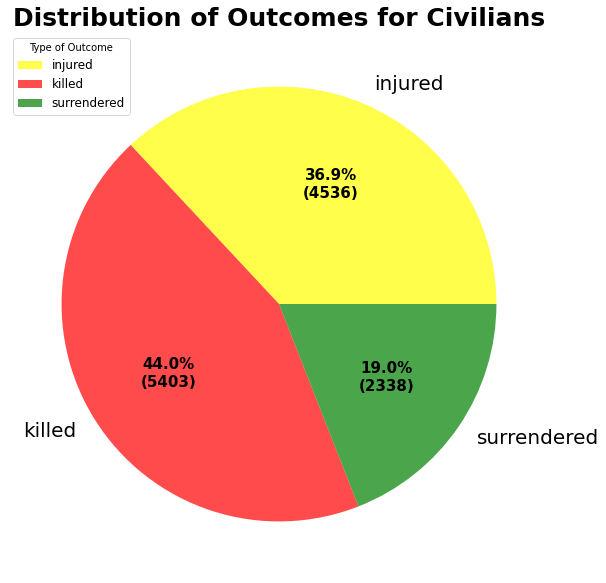

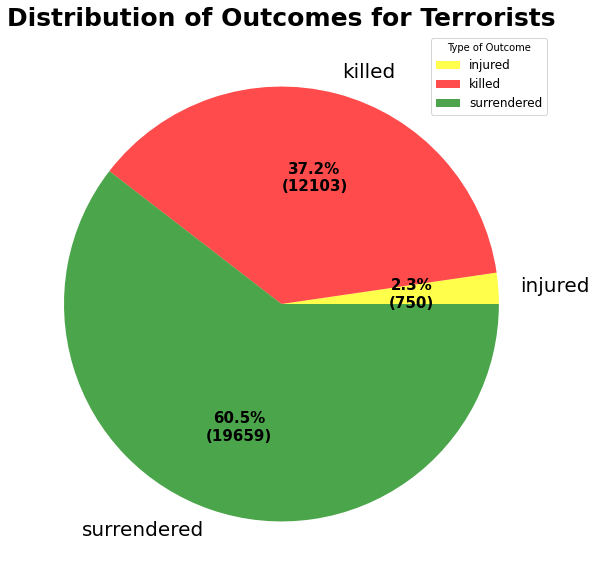

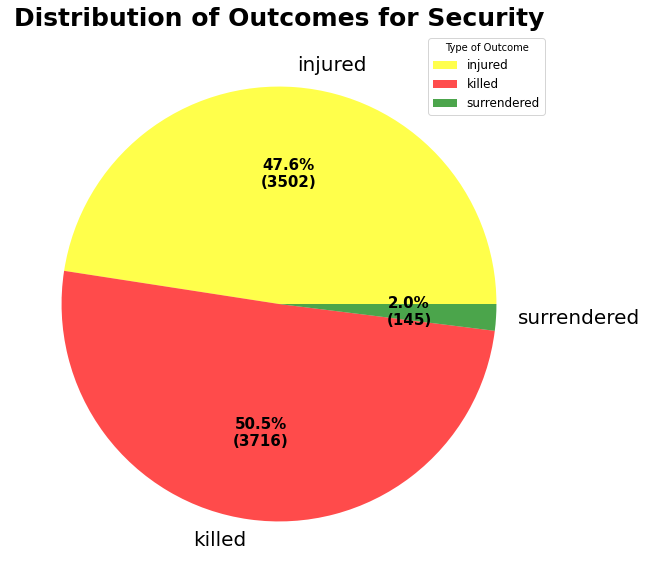

In [43]:
plt.rcParams['figure.figsize'] = [15,10]
groups = ['Civilians','Terrorists','Security']

for group in groups:
    pie_df = df_unanomalous[[group,'Target','Outcome']].groupby('Outcome').sum()
    data = pie_df[group]
    labels = pie_df.index
    wedges, texts, autotexts = plt.pie(data, labels = labels, colors = ['yellow','red','green'], autopct=autopct_format(data), wedgeprops={'alpha': 0.7})
    plt.legend(wedges, labels, title='Type of Outcome', loc=0, prop={'size':12})
    plt.setp(autotexts, size=15, weight="bold", color='black')
    plt.setp(texts, size=20, color='black')
    plt.title('Distribution of Outcomes for {}'.format(group), fontsize=25, weight='bold')
    plt.show()

In [95]:
df_unanomalous['Civilians'].sum()

12277.0

In [96]:
df_unanomalous['Terrorists'].sum()

32512.0

In [97]:
df_unanomalous['Security'].sum()

7363.0

Compraing the totals of different groups via pie chart...

<AxesSubplot:title={'center':'test'}, ylabel='mean'>

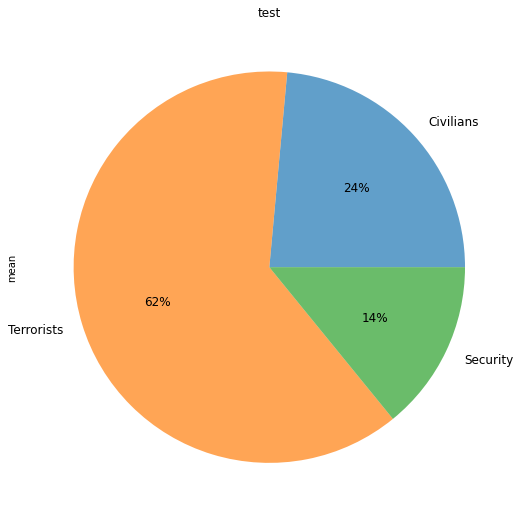

In [73]:
means_df = df_unanomalous.describe()[['Civilians','Terrorists','Security']].iloc[1]
means_df.plot.pie(title='test',autopct='%.0f%%', wedgeprops={'alpha': 0.7}, figsize=(12,9), fontsize=12)

# plt.legend(wedges, labels, title='Type of Outcome', loc=1)

In [88]:
means_df = df_unanomalous.describe()[['Civilians','Terrorists','Security']].iloc[1]
means_df

Civilians     0.487337
Terrorists    1.290568
Security      0.292275
Name: mean, dtype: float64

In [ ]:
# Here we just look at the distribution of total people involved per group (terrorists/security/civilians)

In [74]:
df_unanomalous['Terrorists'].mode(), df_unanomalous['Terrorists'].median()

(0    0.0
 Name: Terrorists, dtype: float64,
 1.0)

In [72]:
df_unanomalous['Security'].mode(), df_unanomalous['Security'].median()

(0    0.0
 Name: Security, dtype: float64,
 0.0)

In [108]:
df_unanomalous['Terrorists'].sum()

32512.0

In [109]:
df_unanomalous['Security'].sum()

7363.0

Generating new heatmap...

In [23]:
corr3 = df_unanomalous.drop(columns=['Maoist?','yeardiffs','Sum of Involvement']).corr()
corr3

,Civilians,Terrorists,Security,Total People Involved
Civilians,1.000000,-0.309100,-0.061527,0.394547
Terrorists,-0.309100,1.000000,-0.201928,0.578050
Security,-0.061527,-0.201928,1.000000,0.338661
Total People Involved,0.394547,0.578050,0.338661,1.000000


In [ ]:
# The most accurate correlation matrix generated yet, due to removal of anomalies

<AxesSubplot:>

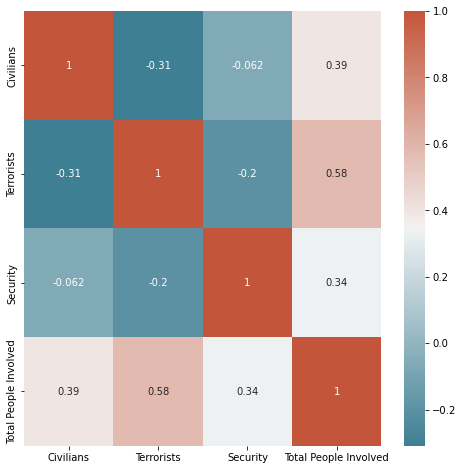

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr3, xticklabels=corr3.columns, yticklabels=corr3.columns, annot=True, cmap=sns.diverging_palette(220,20, as_cmap=True))

In [ ]:
# We se that there is a weak correlation for civlians, terrorists and security to total
# people involved

In [22]:
all_targets = df_unanomalous['Target'].unique()
all_targets

array(['security', 'terrorist', 'civilian', 'public', 'private'],
      dtype=object)

Since value count of private and public targets amount to 130 rows, we will focus on defense ops of security and civilian targets, and offense ops ops of terrorist targets...

In [ ]:
# Earlier we performed chi square tests to check for significant between states and the type of out for any person
# Here we repeat the same tests but for each type of person, namely the security forces, civilians and terrorists

Checking significant of outcomes in states for the security target...

In [20]:
from scipy.stats import chi2_contingency

In [23]:
k = np.where(df_unanomalous['Target'] == all_targets[0])

contingency = pd.crosstab(df_unanomalous['State'].iloc[k],df_unanomalous['Outcome'].iloc[k])
contingency

Outcome,injured,killed,surrendered
State,,,
AP,28,43,53
AR,0,1,1
AS,60,91,54
AS|MN,6,10,0
BR|JH,18,49,26
CT,66,115,15
CT|MP,0,2,0
GJ,0,0,1
JH,46,83,26


In [24]:
contingency.sort_values(by='killed')

Outcome,injured,killed,surrendered
State,,,
KL,1,0,0
TN,1,0,2
PB,1,0,6
GJ,0,0,1
AR,0,1,1
MZ,0,1,0
NL,3,2,4
CT|MP,0,2,0
KA,2,2,1


In [97]:
contingency.describe()

Outcome,injured,killed,surrendered
count,24.000000,24.000000,24.000000
mean,46.083333,69.666667,17.375000
std,111.866348,150.791727,21.048211
min,0.000000,0.000000,0.000000
25%,1.000000,1.750000,1.000000
50%,8.000000,11.000000,5.500000
75%,32.500000,57.500000,27.250000
max,526.000000,667.000000,57.000000


In [23]:
c, p, dof, expected = chi2_contingency(contingency)
c, p, dof

(466.0849718900673, 7.355174159569652e-71, 46)

In [25]:
contingency['Total'] = contingency['injured'] + contingency['killed'] + contingency['surrendered']
contingency.sort_values(by='Total')

Outcome,injured,killed,surrendered,Total
State,,,,
KL,1,0,0,1
GJ,0,0,1,1
MZ,0,1,0,1
AR,0,1,1,2
CT|MP,0,2,0,2
TN,1,0,2,3
KA,2,2,1,5
PB,1,0,6,7
NL,3,2,4,9


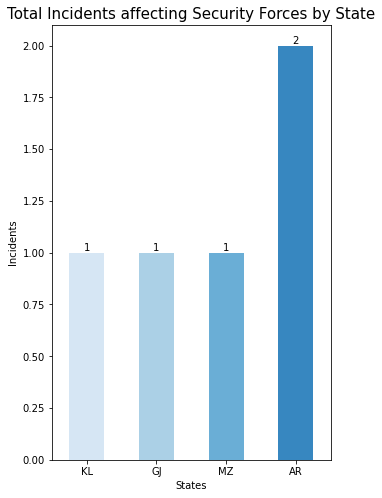

In [26]:
ax = contingency.sort_values(by='Total')['Total'][:4].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Security Forces by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

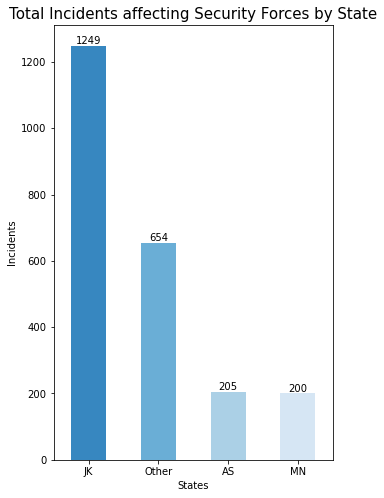

In [27]:
ax = contingency.sort_values(by='Total')['Total'][-4:].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Security Forces by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
ax.invert_xaxis()
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

For terrorist targets...

In [28]:
k = np.where(df_unanomalous['Target'] == all_targets[1])

contingency = pd.crosstab(df_unanomalous['State'].iloc[k],df_unanomalous['Outcome'].iloc[k])
contingency

Outcome,injured,killed,surrendered
State,,,
AP,8,283,270
AR,0,20,52
AS,23,620,1316
AS|MN,0,5,13
BR|JH,8,44,345
CT,11,157,237
CT|MP,0,1,16
GJ,0,2,12
JH,15,95,406


In [52]:
contingency.sort_values(by='killed')

Outcome,injured,killed,surrendered
State,,,
RJ,0,0,8
KL,0,0,13
MZ,0,0,11
CT|MP,0,1,16
PB,0,1,35
TN,0,2,20
GJ,0,2,12
AS|MN,0,5,13
KA,0,5,24


In [244]:
contingency.describe()

Outcome,injured,killed,surrendered
count,25.000000,25.000000,25.000000
mean,8.960000,210.600000,303.640000
std,12.008608,475.825949,490.731247
min,0.000000,0.000000,8.000000
25%,0.000000,2.000000,20.000000
50%,6.000000,42.000000,153.000000
75%,11.000000,129.000000,281.000000
max,45.000000,2167.000000,2117.000000


In [53]:
c, p, dof, expected = chi2_contingency(contingency)
c, p, dof

(2969.9218083126007, 0.0, 48)

In [29]:
contingency['Total'] = contingency['injured'] + contingency['killed'] + contingency['surrendered']
contingency.sort_values(by='Total')

Outcome,injured,killed,surrendered,Total
State,,,,
RJ,0,0,8,8
MZ,0,0,11,11
KL,0,0,13,13
GJ,0,2,12,14
CT|MP,0,1,16,17
AS|MN,0,5,13,18
TN,0,2,20,22
KA,0,5,24,29
PB,0,1,35,36


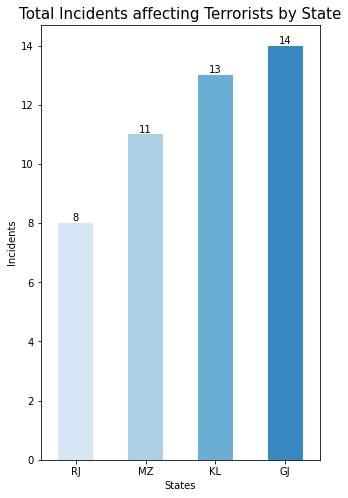

In [30]:
ax = contingency.sort_values(by='Total')['Total'][:4].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Terrorists by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

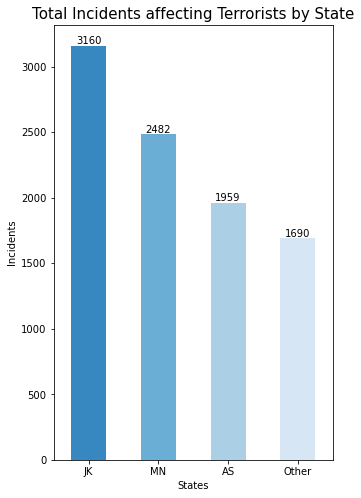

In [31]:
ax = contingency.sort_values(by='Total')['Total'][-4:].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Terrorists by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
ax.invert_xaxis()
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

For civilian targets...

In [32]:
k = np.where(df_unanomalous['Target'] == all_targets[2])

contingency = pd.crosstab(df_unanomalous['State'].iloc[k],df_unanomalous['Outcome'].iloc[k])
contingency

Outcome,injured,killed,surrendered
State,,,
AP,35,246,143
AR,5,4,3
AS,255,342,383
AS|MN,6,0,4
BR|JH,47,118,90
CT,64,184,41
CT|MP,1,1,21
GJ,1,2,29
JH,69,218,121


In [107]:
contingency.sort_values(by='killed')

Outcome,injured,killed,surrendered
State,,,
AS|MN,6,0,4
KL,2,0,14
CT|MP,1,1,21
KA,1,1,23
RJ,1,2,21
GJ,1,2,29
MZ,1,3,6
AR,5,4,3
TN,1,4,30


In [248]:
contingency.describe()

Outcome,injured,killed,surrendered
count,25.000000,25.00000,25.000000
mean,87.880000,143.48000,120.440000
std,186.299338,244.59816,178.047531
min,0.000000,0.00000,3.000000
25%,1.000000,3.00000,23.000000
50%,23.000000,48.00000,67.000000
75%,55.000000,184.00000,104.000000
max,847.000000,1024.00000,791.000000


In [108]:
c, p, dof, expected = chi2_contingency(contingency)
c, p, dof

(1139.3472526816597, 3.7901681573388875e-207, 48)

In [33]:
contingency['Total'] = contingency['injured'] + contingency['killed'] + contingency['surrendered']
contingency.sort_values(by='Total')

Outcome,injured,killed,surrendered,Total
State,,,,
AS|MN,6,0,4,10
MZ,1,3,6,10
AR,5,4,3,12
KL,2,0,14,16
CT|MP,1,1,21,23
RJ,1,2,21,24
KA,1,1,23,25
GJ,1,2,29,32
TN,1,4,30,35


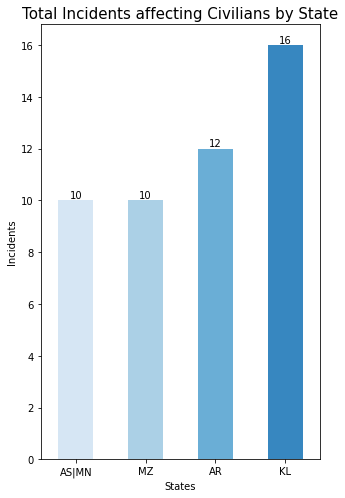

In [34]:
ax = contingency.sort_values(by='Total')['Total'][:4].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Civilians by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

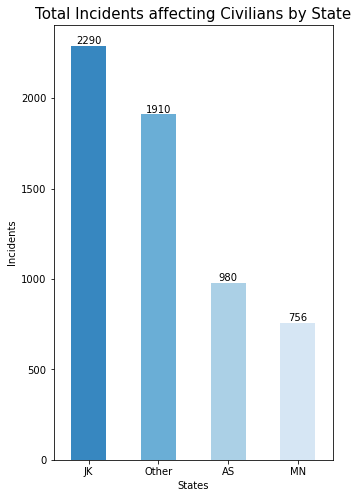

In [35]:
ax = contingency.sort_values(by='Total')['Total'][-4:].plot(kind='bar', figsize=(5,8), color=sns.color_palette("Blues", 5), rot=0)
ax.set_title('Total Incidents affecting Civilians by State', fontsize=15)
ax.set_xlabel('States')
ax.set_ylabel('Incidents')
ax.invert_xaxis()
for bars in ax.containers:
    ax.bar_label(bars)
ax.grid(False)

In [ ]:
# These chi square tests provide valuable info about the relavance of the graphs generated

# Should the chi square tests have had insignificant p-values, then distribution of the graph
# values would be attributed to random chance, hence the differences in values across states
# would not be meaningful 

Checking pie charts for each target based on their outcomes incident-wise...

In [85]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

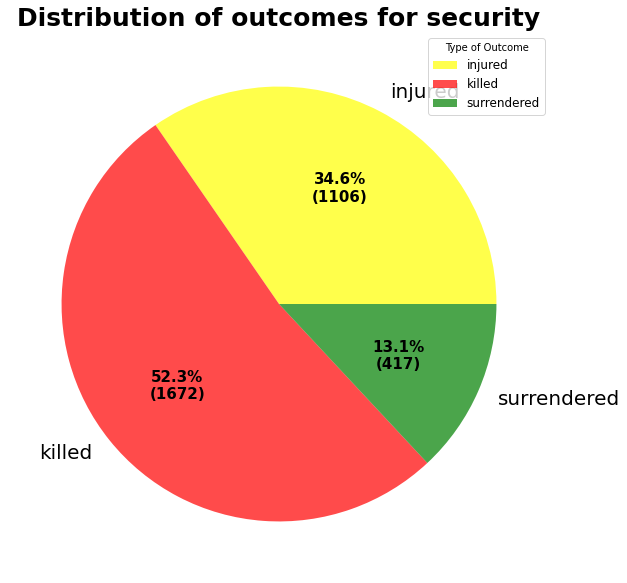

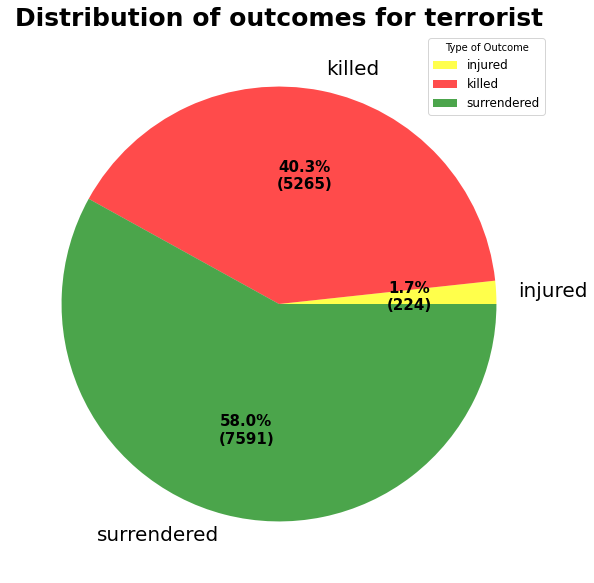

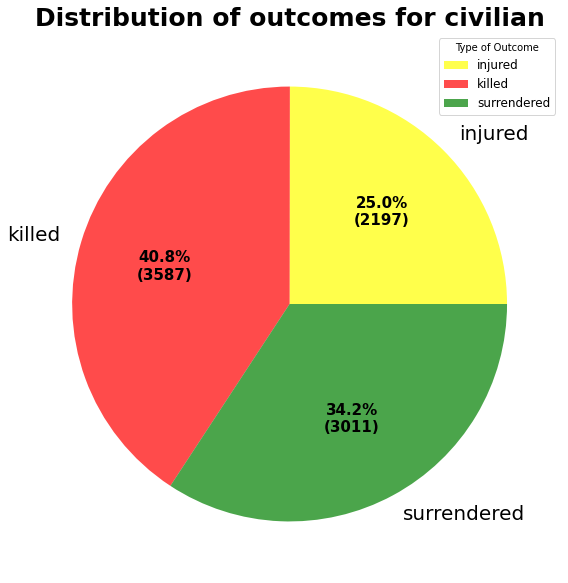

In [86]:
# plt.rcParams['figure.figsize'] = [15,10]

for i in df_unanomalous['Target'].unique()[:3]:
    temp = df_unanomalous.iloc[np.where(df_unanomalous['Target']==i)]
    labels = temp['Outcome'].unique()
    labels.sort()
    data = [temp['Outcome'].iloc[np.where(temp['Outcome']==x)].count() for x in labels]
    
    plt.title('Distribution of outcomes for {}'.format(i), fontsize=25, weight='bold')
    wedges, texts, autotexts = plt.pie(data, labels = labels, colors = ['yellow','red','green'], autopct=autopct_format(data), wedgeprops={'alpha': 0.7})
    plt.legend(wedges, labels, title='Type of Outcome', loc=1, prop={'size':12})
    plt.setp(autotexts, size=15, weight="bold", color='black')
    plt.setp(texts, size=20, color='black')
    plt.show()


Finding average people involved by state...

In [83]:
stateavg_df = df_unanomalous[['State','Total People Involved']].groupby(by=['State']).mean()
stateavg_df.sort_values(by='Total People Involved')

,Total People Involved
State,
KL,1.419355
MN,1.727325
RJ,1.843750
WB,1.942029
ML,1.971360
PB,1.975309
NL,1.995671
JK,2.014120
AS|MN,2.068182


Generating wordcloud on headline...

In [ ]:
# Start of word cloud generation, completed in the 2nd section from top
# "Post Descriptive Analysis Changes "

In [2]:
from wordcloud import WordCloud

In [53]:
df_unanomalous['Headline'].str.split()

0        [In, an, encounter, at, Khurhama,, on, the, ou...
1        [Seven, other, militants, were, killed, in, se...
2        [A, top, Naga, rebel, and, associate, of, Nati...
3        [Seven, militants, of, the, Garo, National, Fr...
4        [In, another, incident,, two, suspected, naxal...
                               ...                        
27228    [Four, Communist, Party, of, India-Maoist, (CP...
27229    [Left-wing, extremists<fc><be><8d><b3><a4><bc>...
27230    [Meanwhile,, the, Security, Force, personnel,,...
27231    [In, addition,, a, Pakistani, militant, of, th...
27232    [Separately,, Arun, Yadav,, a, Maoist,, was, a...
Name: Headline, Length: 25192, dtype: object

(-0.5, 399.5, 199.5, -0.5)

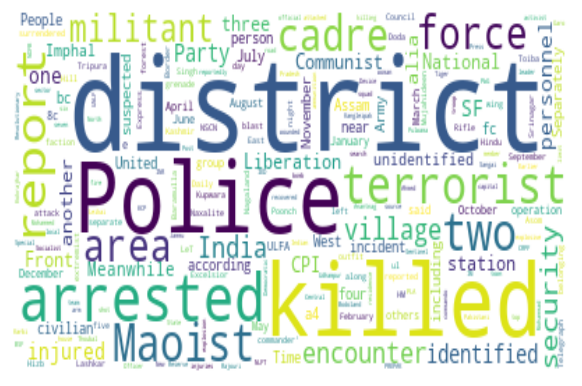

In [60]:
text = " ".join(sentence for sentence in df_unanomalous['Headline'])
wordcloud =  WordCloud(collocations = False, background_color ='white').generate(text)

fig, ax = plt.subplots(dpi=120)
ax.imshow(wordcloud, interpolation='bilinear', aspect='auto')
ax.axis("off")

# sentence1 = df_unanomalous['Headline'][0]


Checking if Maoist involvement affects total people involved...

In [25]:
from scipy.stats import ttest_ind

ttest_ind(df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==True)], df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==False)])

Ttest_indResult(statistic=9.521090311485015, pvalue=1.8622990793215274e-21)

In [ ]:
# T-test reveals that maoist incidents are significant, or in other words
# the difference in total people inovolved between maoist and non-maoist 
# incidents isn't based on chance

In [26]:
df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==True)].mean()

2.3614542887398517

In [27]:
df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==False)].mean()

2.0332751911981752

Text(0.5, 1.0, 'Average People Involved in Maoist & Non-Maoist Incidents')

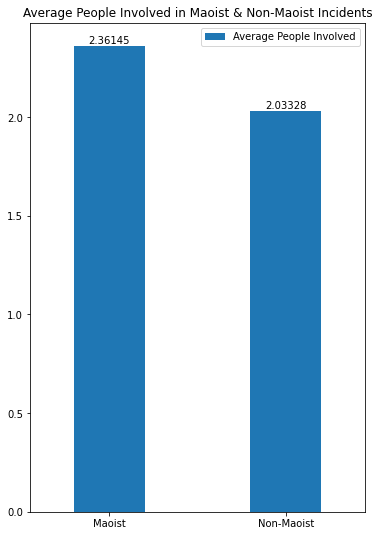

In [55]:
maoist = pd.DataFrame(data=[df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==True)].mean(),df_unanomalous['Total People Involved'].iloc[np.where(df_unanomalous['Maoist?']==False)].mean()],index=['Maoist', 'Non-Maoist'], columns=['Average People Involved'])
ax = maoist.plot(kind='bar', rot=0, width=0.4, figsize=(6,9))
ax.grid(False)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_title('Average People Involved in Maoist & Non-Maoist Incidents')

In [ ]:
# Hence we generate a comparision between maoist and non-maoist incidents and we find
# that maoist incidents cause 0.3 more people to be involved on average and this number 
# is not due to random chance due to the significance of the t-test

Generating Map...

In [ ]:
# The follow section is used to generation a gif frame by frame of the distribution
# and occurences of terrorist incidents throughout the dataset

In [36]:
df_unanomalous['State Name'] = df['state_full'][df_unanomalous.index]

df_unanomalous['State Name'].iloc[np.where(df_unanomalous['State']=='CT')] = 'Chhattisgarh'
df_unanomalous['State Name'].iloc[np.where(df_unanomalous['State']=='Other')] = 'Other'


C:\Users\sixbo\AppData\Local\Temp\ipykernel_4012\2272097758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unanomalous['State Name'].iloc[np.where(df_unanomalous['State']=='CT')] = 'Chhattisgarh'
C:\Users\sixbo\AppData\Local\Temp\ipykernel_4012\2272097758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unanomalous['State Name'].iloc[np.where(df_unanomalous['State']=='Other')] = 'Other'


In [37]:
df_unanomalous

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?,Sum of Involvement,State Name
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False,4.0,Jammu and Kashmir
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False,7.0,Jammu and Kashmir
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False,1.0,Other
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False,7.0,Assam
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True,2.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True,4.0,Jharkhand
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True,1.0,Bihar
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True,1.0,Orissa
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False,1.0,Jammu and Kashmir


In [38]:
import geopandas as gpd
import shapefile as shp 
from shapely.geometry import Point
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [15,10]

In [84]:
fp = PATH +'MapIndia/india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [ ]:
# Shapely and Geopandas were used for generating the maps and above is an example of
# how the shapely file is read 

In [85]:
map_df_copy.iloc[np.where(map_df_copy['st_nm']=='Ladakh')]
map_df_copy.drop([36], inplace=True)


In [86]:
map_df_copy.sort_values(by='st_nm', inplace=True)
map_df_copy = map_df_copy.reset_index()

map_df_copy

,index,id,st_nm,geometry
0,0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,34,None,Andhra Pradesh,"POLYGON ((81.10545 17.82313, 81.39342 17.81473..."
2,1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
3,2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
4,3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
5,4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
6,5,None,Chhattisgarh,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
7,6,None,Dadra and Nagar Haveli,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
8,7,None,Daman and Diu,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
9,22,None,Delhi,"POLYGON ((77.19755 28.86191, 77.33703 28.67912..."


In [ ]:
# map_df_copy.drop(columns=['index','level_0'])

In [43]:
s = gpd.GeoSeries(map_df['geometry'])
s

0     MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...
1     POLYGON ((95.23643 26.68105, 95.19594 27.03612...
2     POLYGON ((95.19594 27.03612, 95.08795 26.94578...
3     POLYGON ((88.11357 26.54028, 88.28006 26.37640...
4     POLYGON ((76.84208 30.76124, 76.83758 30.72552...
5     POLYGON ((83.94694 23.62196, 83.95594 23.62406...
6     POLYGON ((73.20640 20.12165, 73.20865 20.10695...
7     POLYGON ((72.80144 20.37378, 72.84418 20.47463...
8     POLYGON ((74.11982 15.65278, 74.24806 15.65698...
9     MULTIPOLYGON (((68.35808 23.80475, 68.41658 23...
10    POLYGON ((77.12555 30.56374, 77.21329 30.50281...
11    POLYGON ((78.92089 31.25498, 79.01313 31.11211...
12    POLYGON ((87.79410 25.22084, 87.77835 25.10108...
13    POLYGON ((77.55301 18.29376, 77.65650 17.97231...
14    POLYGON ((76.43261 11.66713, 76.23238 11.57049...
15    MULTIPOLYGON (((74.10182 11.20491, 73.96458 11...
16    POLYGON ((82.81529 23.96232, 82.55207 23.79214...
17    POLYGON ((80.66449 21.33184, 80.64649 21.2

In [25]:
map_df['st_nm'].unique()

array(['Andaman and Nicobar Islands', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Daman and Diu', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Delhi', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Odisha', 'Andhra Pradesh',
       'Jammu and Kashmir', 'Ladakh'], dtype=object)

In [87]:
map_df['st_nm'].iloc[np.where(map_df['st_nm'] == 'Ladakh')] = 'Jammu and Kashmir'

<AxesSubplot:>

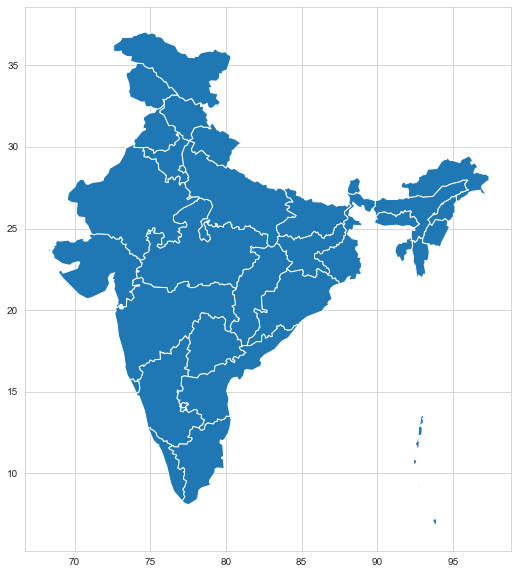

In [45]:
map_df.plot()

In [46]:
df_unanomalous['Report Month'] = df_unanomalous['Report Date'].dt.to_period('M')

In [47]:
# df_unanomalous['Report Month'] = pd.Timestamp(df_unanomalous['Report Month'], unit='D')
df_unanomalous['Report Month'] = pd.to_datetime(df_unanomalous['Report Month'].astype(str))

In [79]:
# df_unanomalous['Report year'] = df_unanomalous['Report Date'].dt.to_period('Y')

In [82]:
# df_unanomalous['Report year'] = pd.to_datetime(df_unanomalous['Report year'].astype(str))

In [88]:
df_unanomalous

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?,Sum of Involvement,State Name,Report Month
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False,4.0,Jammu and Kashmir,2000-03-01
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False,7.0,Jammu and Kashmir,2000-03-01
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False,1.0,Other,2000-03-01
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False,7.0,Assam,2000-03-01
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True,2.0,Other,2000-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True,4.0,Jharkhand,2013-03-01
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True,1.0,Bihar,2002-09-01
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True,1.0,Orissa,2012-01-01
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False,1.0,Jammu and Kashmir,2010-10-01


In [70]:
df_unanomalous['Report Month'].unique()

array(['2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2000-10-01T00:00:00.000000000',
       '2000-11-01T00:00:00.000000000', '2000-12-01T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-02-01T00:00:00.000000000',
       '2001-03-01T00:00:00.000000000', '2001-04-01T00:00:00.000000000',
       '2001-05-01T00:00:00.000000000', '2001-06-01T00:00:00.000000000',
       '2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-06-01

In [89]:
trial1 = df_unanomalous[['Total People Involved','Report Month','State Name']].groupby(['Report Month','State Name']).sum().unstack()
trial1.fillna(0, inplace=True)
trial1

Total People Involved                                             \
State Name          Andhra Pradesh Arunachal Pradesh Assam Bihar Chhattisgarh   
Report Month                                                                    
2000-03-01                     2.0               0.0  10.0  18.0          0.0   
2000-04-01                    25.0               0.0  27.0   2.0          0.0   
2000-05-01                    11.0               0.0  39.0   9.0          0.0   
2000-06-01                     8.0               0.0  69.0   6.0          0.0   
2000-07-01                    13.0               0.0  46.0   0.0          0.0   
...                            ...               ...   ...   ...          ...   
2014-01-01                     0.0               4.0  84.0  18.0         43.0   
2014-02-01                    10.0               0.0  51.0  27.0         41.0   
2014-03-01                     1.0               0.0  38.0  13.0         27.0   
2014-04-01                    19.0               0.0  22.0  25.0         33.0   
2014-05-01                    24.0               4.0  27.0   0.0          7.0   

                                                                   ...  \
State Name   Gujarat Jammu and Kashmir Jharkhand Karnataka Kerala  ...   
Report Month                                                       ...   
2000-03-01       0.0              60.0       0.0       0.0    0.0  ...   
2000-04-01       0.0             209.0       0.0       0.0    0.0  ...   
2000-05-01       0.0             108.0       0.0       0.0    0.0  ...   
2000-06-01       0.0             327.0       0.0       0.0    0.0  ...   
2000-07-01       0.0             122.0       0.0       0.0    0.0  ...   
...              ...               ...       ...       ...    ...  ...   
2014-01-01       0.0              12.0      12.0       0.0    0.0  ...   
2014-02-01       0.0              33.0       6.0       0.0    1.0  ...   
2014-03-01       0.0              43.0      41.0       0.0    2.0  ...   
2014-04-01       0.0              29.0      50.0       0.0    1.0  ...   
2014-05-01       0.0              34.0       4.0       0.0    0.0  ...   

                                                                         \
State Name   Mizoram Nagaland Orissa  Other Punjab Rajasthan Tamil Nadu   
Report Month                                                              
2000-03-01       0.0      0.0    0.0   54.0    1.0       0.0        0.0   
2000-04-01       0.0      0.0    0.0   49.0    0.0       0.0        0.0   
2000-05-01       0.0      0.0    0.0  128.0    4.0       0.0        0.0   
2000-06-01       0.0      0.0    0.0   18.0    0.0       0.0        0.0   
2000-07-01       4.0      0.0    0.0  124.0    1.0       0.0        0.0   
...              ...      ...    ...    ...    ...       ...        ...   
2014-01-01       0.0     13.0   11.0   73.0    0.0       0.0        0.0   
2014-02-01       0.0      8.0    4.0   43.0    0.0       0.0        1.0   
2014-03-01       0.0     20.0    7.0   41.0    0.0      10.0        0.0   
2014-04-01       2.0      5.0    8.0   56.0    2.0       0.0        1.0   
2014-05-01       0.0     12.0   14.0   43.0    0.0       1.0        1.0   

                                                
State Name   Tripura Uttar Pradesh West Bengal  
Report Month                                    
2000-03-01       9.0           0.0         0.0  
2000-04-01      17.0           0.0         2.0  
2000-05-01      11.0           0.0         1.0  
2000-06-01      26.0           0.0         0.0  
2000-07-01      29.0           0.0         0.0  
...              ...           ...         ...  
2014-01-01       1.0           6.0         0.0  
2014-02-01       3.0           2.0         2.0  
2014-03-01       5.0           3.0         4.0  
2014-04-01       0.0           0.0         0.0  
2014-05-01      10.0           1.0         0.0  

[171 rows x 24 columns]

In [90]:
well = pd.crosstab(df_unanomalous['State Name'],df_unanomalous['Report Month'], rownames=['State Name'], colnames=['Report Month']).T
trial = pd.DataFrame(well.values, index=well.index, columns=well.columns)
trial

State Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,...,Mizoram,Nagaland,Orissa,Other,Punjab,Rajasthan,Tamil Nadu,Tripura,Uttar Pradesh,West Bengal
Report Month,,,,,,,,,,,,,,,,,,,,,
2000-03-01,1,0,4,3,0,0,20,0,0,0,...,0,0,0,25,1,0,0,3,0,0
2000-04-01,8,0,10,2,0,0,72,0,0,0,...,0,0,0,20,0,0,0,5,0,1
2000-05-01,4,0,18,2,0,0,64,0,0,0,...,0,0,0,44,1,0,0,3,0,1
2000-06-01,6,0,31,2,0,0,139,0,0,0,...,0,0,0,9,0,0,0,11,0,0
2000-07-01,3,0,21,0,0,0,60,0,0,0,...,1,0,0,52,1,0,0,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,0,1,30,8,20,0,7,8,0,0,...,0,5,8,25,0,0,0,1,1,0
2014-02-01,3,0,18,11,18,0,8,7,0,1,...,0,7,3,18,0,0,1,1,1,1
2014-03-01,1,0,19,3,11,0,14,18,0,1,...,0,11,4,15,0,5,0,2,2,2


In [91]:
monthly_people_df = df_unanomalous.groupby('Report Month').sum()['Total People Involved']
monthly_people_df

Report Month
2000-03-01    173
2000-04-01    342
2000-05-01    320
2000-06-01    474
2000-07-01    355
             ... 
2014-01-01    321
2014-02-01    298
2014-03-01    285
2014-04-01    313
2014-05-01    214
Name: Total People Involved, Length: 171, dtype: int64

In [92]:
trial2 = trial.copy()

In [ ]:
# The copy of trial is required for a subgraph within the gif, which will show the monthly occurences 
# of terror incidents. That dataframe is near idenitical however since it requires monthly rates we
# cannot use summation functions like cumsum() and that is seen below

In [93]:
trial[trial.columns] = trial[trial.columns].cumsum()
trial

State Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,...,Mizoram,Nagaland,Orissa,Other,Punjab,Rajasthan,Tamil Nadu,Tripura,Uttar Pradesh,West Bengal
Report Month,,,,,,,,,,,,,,,,,,,,,
2000-03-01,1,0,4,3,0,0,20,0,0,0,...,0,0,0,25,1,0,0,3,0,0
2000-04-01,9,0,14,5,0,0,92,0,0,0,...,0,0,0,45,1,0,0,8,0,1
2000-05-01,13,0,32,7,0,0,156,0,0,0,...,0,0,0,89,2,0,0,11,0,2
2000-06-01,19,0,63,9,0,0,295,0,0,0,...,0,0,0,98,2,0,0,22,0,2
2000-07-01,22,0,84,9,0,0,355,0,0,0,...,1,0,0,150,3,0,0,33,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,1102,85,3144,726,847,47,6679,1046,59,28,...,21,427,640,4189,80,26,59,718,150,480
2014-02-01,1105,85,3162,737,865,47,6687,1053,59,29,...,21,434,643,4207,80,26,60,719,151,481
2014-03-01,1106,85,3181,740,876,47,6701,1071,59,30,...,21,445,647,4222,80,31,60,721,153,483


In [94]:
trial1[trial1.columns] = trial1[trial1.columns].cumsum()
trial1

Total People Involved                                    \
State Name          Andhra Pradesh Arunachal Pradesh   Assam   Bihar   
Report Month                                                           
2000-03-01                     2.0               0.0    10.0    18.0   
2000-04-01                    27.0               0.0    37.0    20.0   
2000-05-01                    38.0               0.0    76.0    29.0   
2000-06-01                    46.0               0.0   145.0    35.0   
2000-07-01                    59.0               0.0   191.0    35.0   
...                            ...               ...     ...     ...   
2014-01-01                  2321.0             186.0  6686.0  1819.0   
2014-02-01                  2331.0             186.0  6737.0  1846.0   
2014-03-01                  2332.0             186.0  6775.0  1859.0   
2014-04-01                  2351.0             186.0  6797.0  1884.0   
2014-05-01                  2375.0             190.0  6824.0  1884.0   

                                                                         \
State Name   Chhattisgarh Gujarat Jammu and Kashmir Jharkhand Karnataka   
Report Month                                                              
2000-03-01            0.0     0.0              60.0       0.0       0.0   
2000-04-01            0.0     0.0             269.0       0.0       0.0   
2000-05-01            0.0     0.0             377.0       0.0       0.0   
2000-06-01            0.0     0.0             704.0       0.0       0.0   
2000-07-01            0.0     0.0             826.0       0.0       0.0   
...                   ...     ...               ...       ...       ...   
2014-01-01         2187.0   118.0           13412.0    2423.0     138.0   
2014-02-01         2228.0   118.0           13445.0    2429.0     138.0   
2014-03-01         2255.0   118.0           13488.0    2470.0     138.0   
2014-04-01         2288.0   118.0           13517.0    2520.0     138.0   
2014-05-01         2295.0   118.0           13551.0    2524.0     138.0   

                     ...                                                    \
State Name   Kerala  ... Mizoram Nagaland  Orissa   Other Punjab Rajasthan   
Report Month         ...                                                     
2000-03-01      0.0  ...     0.0      0.0     0.0    54.0    1.0       0.0   
2000-04-01      0.0  ...     0.0      0.0     0.0   103.0    1.0       0.0   
2000-05-01      0.0  ...     0.0      0.0     0.0   231.0    5.0       0.0   
2000-06-01      0.0  ...     0.0      0.0     0.0   249.0    5.0       0.0   
2000-07-01      0.0  ...     4.0      0.0     0.0   373.0    6.0       0.0   
...             ...  ...     ...      ...     ...     ...    ...       ...   
2014-01-01     40.0  ...    53.0    877.0  1331.0  8917.0  158.0      48.0   
2014-02-01     41.0  ...    53.0    885.0  1335.0  8960.0  158.0      48.0   
2014-03-01     43.0  ...    53.0    905.0  1342.0  9001.0  158.0      58.0   
2014-04-01     44.0  ...    55.0    910.0  1350.0  9057.0  160.0      58.0   
2014-05-01     44.0  ...    55.0    922.0  1364.0  9100.0  160.0      59.0   

                                                           
State Name   Tamil Nadu Tripura Uttar Pradesh West Bengal  
Report Month                                               
2000-03-01          0.0     9.0           0.0         0.0  
2000-04-01          0.0    26.0           0.0         2.0  
2000-05-01          0.0    37.0           0.0         3.0  
2000-06-01          0.0    63.0           0.0         3.0  
2000-07-01          0.0    92.0           0.0         3.0  
...                 ...     ...           ...         ...  
2014-01-01        126.0  1554.0         315.0       932.0  
2014-02-01        127.0  1557.0         317.0       934.0  
2014-03-01        127.0  1562.0         320.0       938.0  
2014-04-01        128.0  1562.0         320.0       938.0  
2014-05-01        129.0  1572.0         321.0       938.0  

[171 rows x 24 colu

In [110]:
trial1.columns = trial2.columns

In [95]:
trial2

State Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Gujarat,Jammu and Kashmir,Jharkhand,Karnataka,Kerala,...,Mizoram,Nagaland,Orissa,Other,Punjab,Rajasthan,Tamil Nadu,Tripura,Uttar Pradesh,West Bengal
Report Month,,,,,,,,,,,,,,,,,,,,,
2000-03-01,1,0,4,3,0,0,20,0,0,0,...,0,0,0,25,1,0,0,3,0,0
2000-04-01,8,0,10,2,0,0,72,0,0,0,...,0,0,0,20,0,0,0,5,0,1
2000-05-01,4,0,18,2,0,0,64,0,0,0,...,0,0,0,44,1,0,0,3,0,1
2000-06-01,6,0,31,2,0,0,139,0,0,0,...,0,0,0,9,0,0,0,11,0,0
2000-07-01,3,0,21,0,0,0,60,0,0,0,...,1,0,0,52,1,0,0,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,0,1,30,8,20,0,7,8,0,0,...,0,5,8,25,0,0,0,1,1,0
2014-02-01,3,0,18,11,18,0,8,7,0,1,...,0,7,3,18,0,0,1,1,1,1
2014-03-01,1,0,19,3,11,0,14,18,0,1,...,0,11,4,15,0,5,0,2,2,2


In [111]:
final = trial1.T

In [97]:
final2 = trial2.T

In [113]:
merged = map_df.set_index('st_nm').join(final.set_index(final.index))
merged.head()

,id,geometry,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,...,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,None,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",2.0,27.0,38.0,46.0,59.0,68.0,87.0,96.0,...,2301.0,2311.0,2314.0,2314.0,2321.0,2321.0,2331.0,2332.0,2351.0,2375.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,168.0,172.0,173.0,173.0,182.0,186.0,186.0,186.0,186.0,190.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",10.0,37.0,76.0,145.0,191.0,249.0,272.0,293.0,...,6418.0,6458.0,6493.0,6579.0,6602.0,6686.0,6737.0,6775.0,6797.0,6824.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",18.0,20.0,29.0,35.0,35.0,35.0,53.0,77.0,...,1726.0,1736.0,1753.0,1769.0,1801.0,1819.0,1846.0,1859.0,1884.0,1884.0


In [99]:
merged2 = map_df.set_index('st_nm').join(final2.set_index(final2.index))
merged2.head()

,id,geometry,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,2000-10-01 00:00:00,...,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,None,"POLYGON ((81.10545 17.82313, 81.39342 17.81473...",1.0,8.0,4.0,6.0,3.0,4.0,11.0,6.0,...,0.0,5.0,2.0,0.0,2.0,0.0,3.0,1.0,4.0,4.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",4.0,10.0,18.0,31.0,21.0,26.0,12.0,7.0,...,13.0,17.0,15.0,31.0,18.0,30.0,18.0,19.0,12.0,9.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",3.0,2.0,2.0,2.0,0.0,0.0,4.0,7.0,...,6.0,3.0,3.0,9.0,12.0,8.0,11.0,3.0,11.0,0.0


In [114]:
merged = merged.fillna(0)
merged2 = merged2.fillna(0)

In [115]:
final_map = merged.drop(columns = 'id')
final_map2 = merged2.drop(columns = 'id')

In [116]:
final_map.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [ ]:
import PIL
import io
import datetime
import warnings

warnings.filterwarnings('ignore') # supresses geopandas warnings
img_frames, x_1, y_1 = [], [], []
# plt.rcParams['figure.figsize'] = [10,8]

for i in final_map.columns[1:]:

    fig = plt.figure(figsize=(9,9),dpi=100)

    ax1 = fig.add_axes([0.1,0.1,0.9,0.9])

    final_map.plot(column=i,cmap='OrRd', ax = ax1, linewidth=0.8, legend=True, legend_kwds={'title': 'People Involved Ranges', 'bbox_to_anchor': [.56, .1, .2, .2]} , scheme = 'userdefined',classification_kwds = {'bins':[0,100,200,500,1500,4500,9000,14000]},edgecolor = 'black')
    ax1.set_title('Terror effects in India from 2000-03 to {}'.format(pd.to_datetime(i).to_period('M')), fontdict={'fontsize':20}, y=-0.01)
    ax1.set_axis_off()
    # x_1.append(i)
    temp_arr= final_map2[i].values
    value_arr = temp_arr.astype(int)
    temp_arr2 = final_map[i].values
    value_arr2 = temp_arr2.astype(int)
    value_arr = np.delete(value_arr, [14]) #deletes duplicate row
    value_arr2 = np.delete(value_arr2, [14])
    # y_1.append(value_arr.sum())
    
    x_1.append(i)
    y_1.append(monthly_people_df[i])

    axes_2 = fig.add_axes([.56, .8, .40, .2])
    axes_2.plot(x_1,y_1,'r')
    axes_2.set_xlim([datetime.date(2000,3,1), datetime.date(2014,5,1)])
    axes_2.set_ylim([0,700])
    axes_2.set_xlabel('Years')
    axes_2.set_ylabel('People')
    axes_2.grid(False)
    
    
    
    # ax1.scatter(x=map_df_copy.centroid.x, y=map_df_copy.centroid.y)
    for j, txt in enumerate(value_arr2):
        if(txt!=0):
            ax1.annotate(txt,(map_df_copy.centroid.x[j],map_df_copy.centroid.y[j]), fontsize=12)

    # Add text to plot from central point of 0,0
    
    img = ax1.get_figure()
    f = io.BytesIO()
    img.savefig(f, format = 'png')
    f.seek(0)   
    img_frames.append(PIL.Image.open(f))


In [ ]:
# The code has been commented as each frame is generated as an image for verification

# Thus it results in the filesize of this notebook increasing from 3MB to 33MB (as it was at this point)

In [123]:
img_frames[0].save(PATH+'Terror_attacks2.gif', format = 'GIF', append_images = img_frames[1:],save_all = True, duration = 300,loop = 1)

END OF MAP

Total Maoist incidents in cleaned dataset...

In [216]:
df_unanomalous['Maoist?'].value_counts()

False    22359
True      2833
Name: Maoist?, dtype: int64

### Terrorism Incidents from 2000 to (mid) 2014 (Predictive Analyses)

Testing regression on individual groups predicting sum of all groups...

In [ ]:
# We try to apply linear regression to see if we can use civilians, terrorists and security columns to predict
# the total people involved

In [26]:
df_regtest = df_unanomalous[['Civilians', 'Terrorists', 'Security', 'Total People Involved']]

In [27]:
df_regtest

,Civilians,Terrorists,Security,Total People Involved
0,0.0,3.0,1.0,4
1,0.0,7.0,0.0,7
2,0.0,1.0,0.0,1
3,0.0,7.0,0.0,7
4,0.0,2.0,0.0,2
...,...,...,...,...
27228,0.0,4.0,0.0,4
27229,0.0,1.0,0.0,1
27230,0.0,1.0,0.0,1
27231,0.0,1.0,0.0,1


Checking for linear relation to predictor...(multicollinearity present with weak validity)

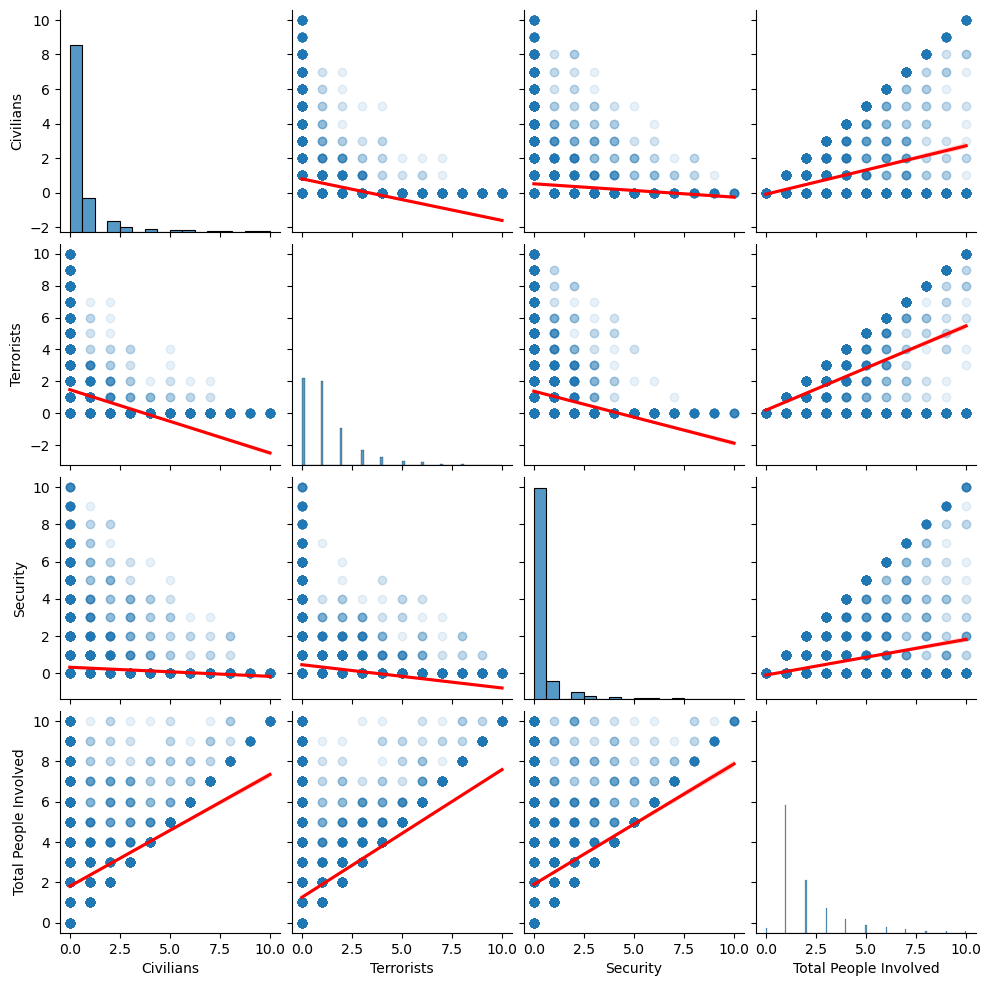

In [23]:
sns.pairplot(df_regtest, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Scoring Linear Regression Model...

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


X = np.array([df_regtest['Civilians'],df_regtest['Terrorists'], df_regtest['Security']])
y = np.array([df_regtest['Total People Involved']])

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, random_state=42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
pipe.score(X_test, y_test)

1.0

Trying without pipeline...

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transform = scaler.transform(X_train)
reg = LinearRegression().fit(X_train_transform, y_train)
reg.score(X_train_transform, y_train)

1.0

In [ ]:
# The regression score of 1 means we can perfectly predict the number of total people involved
# based on the civlians, security and terrorist numbers. This is indeed the case as the total
# people involved is always the sum of the 3 different groups.

Checking columns for encoding...

In [ ]:
# In the follow sections we try to use other columns to predict total people involved and year differences

In [31]:
df_unanomalous

,Judgement Date,Civilians,Terrorists,Security,Total People Involved,Report Date,Headline,State,Target,Outcome,yeardiffs,Maoist?,Sum of Involvement,State Name,Report Month
0,2015-04-30 08:54:00,0.0,3.0,1.0,4,2000-03-07,"In an encounter at Khurhama, on the outskirts ...",JK,security,killed,15.147117,False,4.0,Jammu and Kashmir,2000-03-01
1,2015-04-30 09:41:00,0.0,7.0,0.0,7,2000-03-07,Seven other militants were killed in separate ...,JK,terrorist,killed,15.147206,False,7.0,Jammu and Kashmir,2000-03-01
2,2015-04-30 08:35:00,0.0,1.0,0.0,1,2000-03-07,A top Naga rebel and associate of National Soc...,Other,terrorist,surrendered,15.147081,False,1.0,Other,2000-03-01
3,2015-04-30 09:12:00,0.0,7.0,0.0,7,2000-03-07,Seven militants of the Garo National Front (GN...,AS,terrorist,surrendered,15.147151,False,7.0,Assam,2000-03-01
4,2015-04-30 09:23:00,0.0,2.0,0.0,2,2000-03-08,"In another incident, two suspected naxalites b...",Other,terrorist,killed,15.144434,True,2.0,Other,2000-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27228,2015-05-05 13:45:00,0.0,4.0,0.0,4,2013-03-05,Four Communist Party of India-Maoist (CPI-Maoi...,JH,terrorist,surrendered,2.167253,True,4.0,Jharkhand,2013-03-01
27229,2015-05-05 06:23:00,0.0,1.0,0.0,1,2002-09-19,Left-wing extremists<fc><be><8d><b3><a4><bc>Na...,BR|JH,terrorist,killed,12.625217,True,1.0,Bihar,2002-09-01
27230,2015-05-05 13:08:00,0.0,1.0,0.0,1,2012-01-22,"Meanwhile, the Security Force personnel, arres...",OR,terrorist,surrendered,3.284249,True,1.0,Orissa,2012-01-01
27231,2015-05-05 05:48:00,0.0,1.0,0.0,1,2010-10-01,"In addition, a Pakistani militant of the LeT w...",JK,terrorist,killed,4.592132,False,1.0,Jammu and Kashmir,2010-10-01


In [32]:
df_unanomalous = df_unanomalous.reset_index()

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
one_hot_columns  = df_unanomalous[['Maoist?','Target','Outcome']]
enc.fit(one_hot_columns)
cols = enc.transform(one_hot_columns).toarray()
cols.shape

(25192, 10)

In [142]:
enc.categories_

[array([False,  True]),
 array(['civilian', 'private', 'public', 'security', 'terrorist'],
       dtype=object),
 array(['injured', 'killed', 'surrendered'], dtype=object)]

In [141]:
numeric_col = df_unanomalous[['Civilians','Terrorists','Security']]
X = pd.concat([numeric_col, pd.DataFrame(cols)], axis=1)
X

,Civilians,Terrorists,Security,0,1,2,3,4,5,6,7,8,9
0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25189,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25190,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [143]:
X.columns = ['Civilians', 'Terrorists', 'Security', 'MaoistF', 'MaoistT', 'CivTarget', 'PrivTarget', 'PubTarget', 'SecTarget', 'TerrTarget', 'OInjured', 'OKilled', 'OSurrendered']
X

,Civilians,Terrorists,Security,MaoistF,MaoistT,CivTarget,PrivTarget,PubTarget,SecTarget,TerrTarget,OInjured,OKilled,OSurrendered
0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25189,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25190,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<AxesSubplot:>

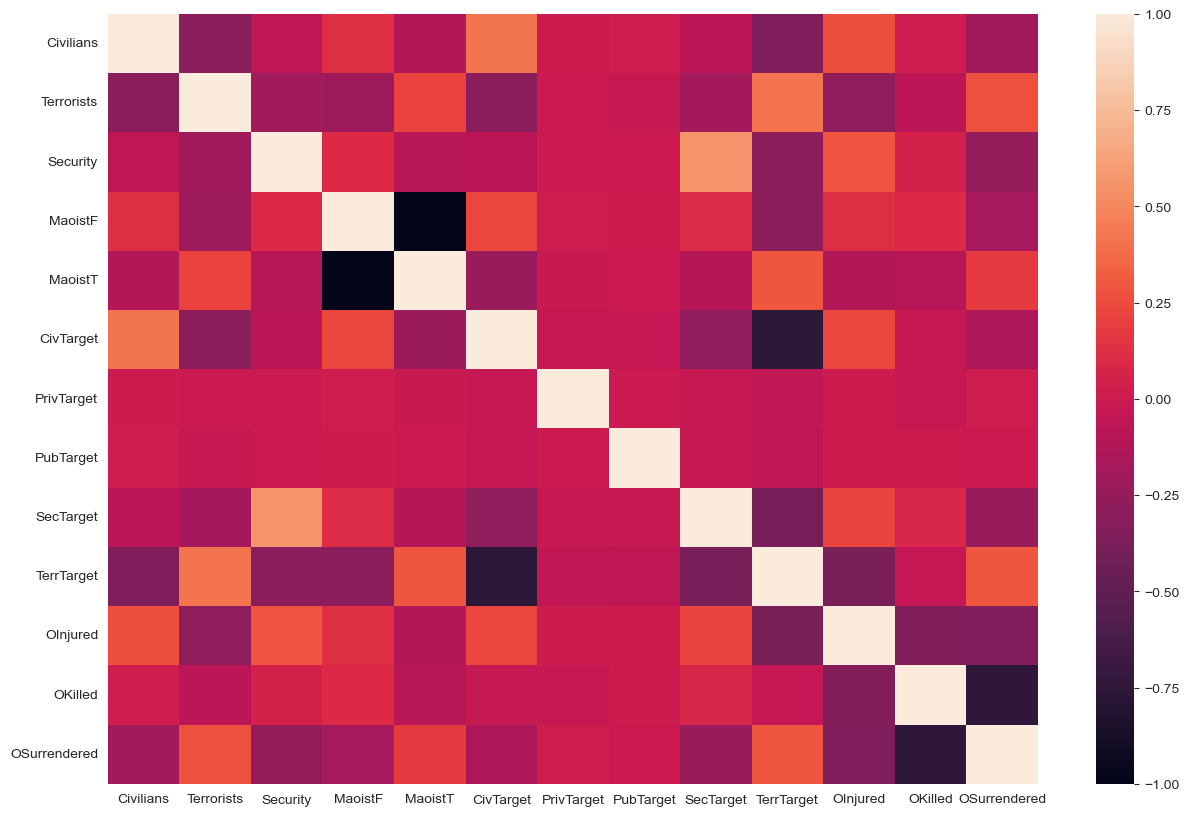

In [144]:
corr4 = X.corr()
sns.heatmap(corr4) #after checking for multicollinearity, be ready to drop strongly correlated columns for linear regression

Testing Regression on encoded columns...

In [146]:
X.drop(columns=['Civilians','Terrorists','Security'], inplace=True)
X

,MaoistF,MaoistT,CivTarget,PrivTarget,PubTarget,SecTarget,TerrTarget,OInjured,OKilled,OSurrendered
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25187,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25188,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25189,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
25190,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [149]:
Xval = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(Xval, y.T, random_state=42)

In [150]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.016883916499512486

In [ ]:
# As we see with the low regression score, the other columns do not capture any relevant information to predict
# the total people involved. This becomes easier to verify once we realize that the civilians, terrorists and 
# security columns already contain enough information to make this prediction.

Standardizing and One Hot Encoding...

In [34]:
X1 = df_unanomalous[['Civilians','Terrorists','Security']]
scaler.fit(X1)
X1 = scaler.transform(X1)
X1.shape

(25192, 3)

In [153]:
enc = OneHotEncoder(handle_unknown='ignore')
one_hot_columns_2  = df_unanomalous[['State','Maoist?','Target','Outcome']]
enc.fit(one_hot_columns_2)
cols2 = enc.transform(one_hot_columns_2).toarray()
cols2.shape

(25192, 35)

In [156]:
X = np.concatenate((X1, cols2), axis=1)
X.shape

(25192, 38)

In [35]:
y = np.array(df_unanomalous['yeardiffs'])
y.shape

(25192,)

Testing Linear Regression Model...

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y.T, random_state=123)

In [159]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.32006823527994044

In [ ]:
# Similar to the previous test but instead on year differences. Again, the score isn't high 
# enough to consider relevance.

Now trying with Label Encoding on Outcome...

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
X2 = np.array(df_unanomalous['Outcome'])
le = LabelEncoder()
le.fit(X2)
X2 = le.transform(X2)
X2.shape

(25192,)

In [163]:
X2

array([1, 1, 2, ..., 2, 1, 2])

In [41]:
enc = OneHotEncoder(handle_unknown='ignore')
one_hot_columns_3  = df_unanomalous[['State','Maoist?','Target']]
enc.fit(one_hot_columns_3)
cols3 = enc.transform(one_hot_columns_3).toarray()
cols3.shape

(25192, 32)

In [40]:
X2 = X2.reshape(25192,1)
X2

array([[1],
       [1],
       [2],
       ...,
       [2],
       [1],
       [2]])

In [42]:
X = np.concatenate((X1, X2, cols3), axis=1)
X.shape

(25192, 36)

Testing Linear Regression Model...

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y.T, random_state=123)

In [44]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.2842141247759604

In [ ]:
# A variant of the previous test, with one-hot encoding instead of label encoding

Trying with new Label Encoding...

In [45]:
label = {'killed':3, 'surrendered':0, 'injured':1}
X2=df_unanomalous[["Outcome"]].replace({"Outcome": label})
X2.shape

(25192, 1)

In [56]:
X = np.concatenate((X1, X2, cols3), axis=1)
X.shape

(25192, 36)

Testing Linear Regression Model...

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y.T, random_state=123)

In [58]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.30444182797551955

In [ ]:
# Another variant, with the label encoding having higher weights on the 'killed' label

Testing Polynomial Regression Model...

In [ ]:
# Tested various polynomial regression techniques in the follow sections, to see 
# if better scores would be possible

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
reg.fit(X_train_trans, y_train)
reg.score(X_test_trans, y_test)

-6.629279279080581e+20

In [47]:
linear_regression = LinearRegression(normalize=False,
fit_intercept=True)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False,
include_bias=False)
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False,
include_bias=False)
linear_predictor = make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic,
linear_regression)
cubic_predictor = make_pipeline(create_cubic, linear_regression)

In [48]:
from sklearn.metrics import r2_score

r2_score_linear = r2_score(y_test,linear_predictor.fit(X_train,y_train).predict(X_test))
r2_score_quadratic = r2_score(y_test,quadratic_predictor.fit(X_train,y_train).predict(X_test))
r2_score_cubic = r2_score(y_test,cubic_predictor.fit(X_train,y_train).predict(X_test))

d:\Anaconda\envs\geoenv\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
d:\Anaconda\envs\geoenv\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
d:\Anaconda\envs\geoenv\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Plea

In [49]:
print("Linear: {}, Quadratic: {}, Cubic: {}".format(r2_score_linear,r2_score_quadratic,r2_score_cubic))

Linear: 0.30444182797551955, Quadratic: -1.20083605618569e+21, Cubic: -4.3839365893113505e+20


Finding MAEs...

In [59]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

reg.fit(X_train, y_train)
print("MAE train set:", mean_absolute_error(y_train, reg.predict(X_train)))
print("MAE test set:", mean_absolute_error(y_test, reg.predict(X_test)))

MAE train set: 2.774104840197041
MAE test set: 2.7793309751410336


In [64]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
print("MAE train set:", mean_absolute_error(y_train, sgd.predict(X_train)))
print("MAE test set:", mean_absolute_error(y_test, sgd.predict(X_test)))

MAE train set: 2.778519169873863
MAE test set: 2.7781451677735785


In [65]:
sgd.score(X_test, y_test)

0.3087702726063196

In [66]:
sgd = SGDRegressor(n_iter_no_change=100)
sgd.fit(X_train, y_train)
print("MAE train set:", mean_absolute_error(y_train, sgd.predict(X_train)))
print("MAE test set:", mean_absolute_error(y_test, sgd.predict(X_test)))

MAE train set: 2.7794209940600707
MAE test set: 2.782396026176705


Trying Polynomial...

In [67]:
poly.fit_transform(X_train[:10,:]).shape[1]

703

KFold(n_splits=3, random_state=None, shuffle=False)
FOLD:  1
MAE train set: 2.246535804541136
MAE test set: 7.022746242844701
FOLD:  2
MAE train set: 3.7138148494002916
MAE test set: 1.9887840832924095
FOLD:  3
MAE train set: 2.0768188524146165
MAE test set: 6.833137608650457


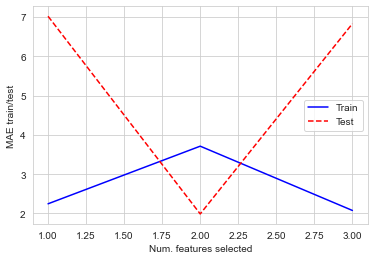

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn import feature_selection
from sklearn.model_selection import StratifiedKFold
import gc


to_plot = []
import warnings
warnings.filterwarnings("ignore")


kf = KFold(n_splits=3, shuffle=False)
kf.get_n_splits(X)
print(kf)
c=1
for train_index, test_index in kf.split(X):
    
    print("FOLD: ", c)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # regr = LinearRegression()
    # poly = PolynomialFeatures()
    # f_sel = SelectKBest(feature_selection.f_regression, k=c)
    
    pipe = make_pipeline(PolynomialFeatures(), SelectKBest(feature_selection.f_regression, k=c),  LinearRegression())
    pipe.fit(X_train, y_train)

    mae_train = mean_absolute_error(y_train,pipe.predict(X_train))

    mae_test = mean_absolute_error(y_test, pipe.predict(X_test))

    print("MAE train set:", mae_train)
    print("MAE test set:", mae_test)
    to_plot.append((c,mae_train, mae_test))
    c+=1
    
plt.plot([i[0] for i in to_plot], [i[1] for i in to_plot], 'b', label='Train')
plt.plot([i[0] for i in to_plot], [i[2] for i in to_plot], 'r--', label='Test')
plt.xlabel('Num. features selected')
plt.ylabel('MAE train/test')
plt.legend(loc=0)


In [ ]:
# Polynomial scores were worse, leading us to believe that the method is less suited for the
# data we have.

Checking range of judgement dates...

In [50]:
date_range = str(df_unanomalous['Judgement Date'].dt.date.min()) + ' to ' +str(df_unanomalous['Judgement Date'].dt.date.max())
date_range

'2015-04-30 to 2015-05-06'

In [ ]:
# Here we check the relevance of the dates and find that the Judgement Dates column was mislabeled in the dataset

# It is infact the date that data point is added to the dataset and not when a judgement was passed, thus also making 
# our year differences column irrelevant, leading to our poor regression performances.

Plotting total people to date via plotly...

In [ ]:
# In the following sections we perform time series analysis - we attempt to predict future frequencies
# of total people involved based on previous frequiencies

In [41]:
import plotly.express as px

In [59]:
df = df_unanomalous[['Report Date','Total People Involved']]
df = df.set_index('Report Date')
df = df.groupby(df.index).sum()
df = df.resample('M').sum()

fig = px.line(df,x=df.index, y='Total People Involved', title='Slider')
fig.update_layout(
    xaxis=dict(
                rangeselector = dict(
                    buttons = list([
                dict(count=1,label ="1y", step="year",stepmode="backward"),
                dict(count=2,label ="2y", step="year",stepmode="backward"),
                dict(count=3,label ="3y", step="year",stepmode="backward"),
                dict(count=4,label ="4y", step="year",stepmode="backward"),
                  ])
                ),
                rangeslider=dict(
            visible=True
        ),
    ))

Doing the Dicky-Fuller...

In [60]:
from statsmodels.tsa.stattools import adfuller

In [61]:
adf = adfuller(df)
print("p-value of monthly terroist attacks 2000-2014: {}".format(float(adf[1])))

p-value of monthly terroist attacks 2000-2014: 8.893621354729008e-05


In [ ]:
# Through the ADF test we find that the time series for total people involved per month is stationary

Plotting ACF and PACF...

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

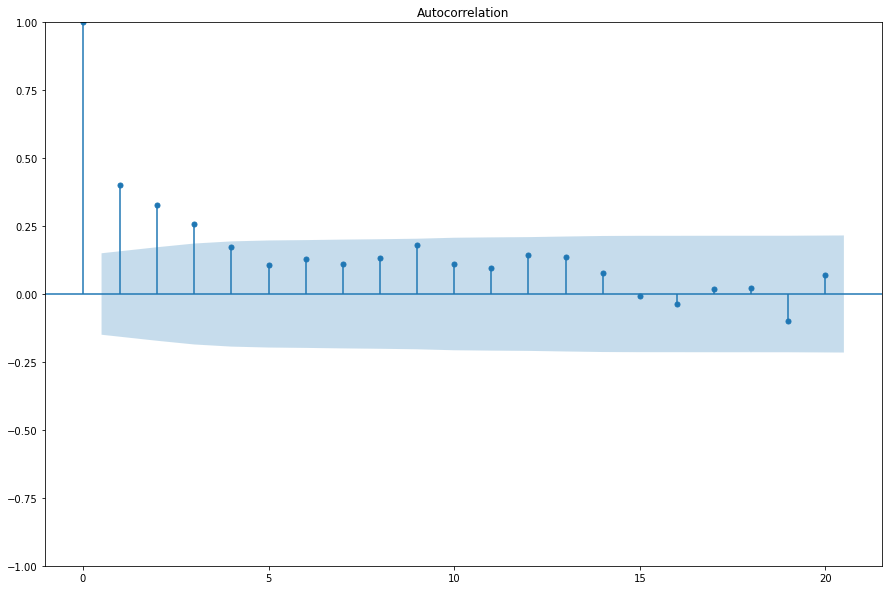

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



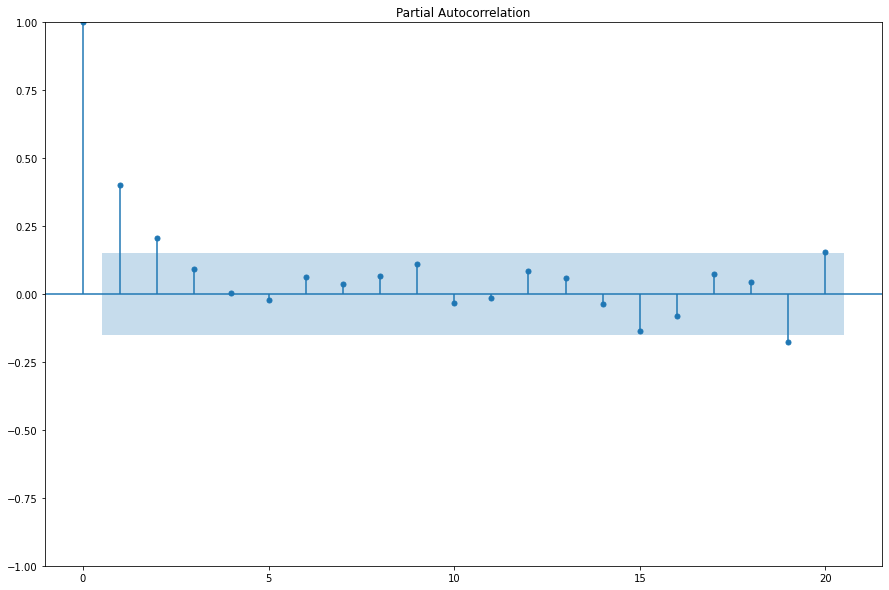

In [63]:
plot_acf(df,lags=20)
plt.show()
plot_pacf(df,lags=20)
plt.show()

Based on ACF & PACF, we use ARMA(2,3) model...

Creating Training & Testing sets...

In [81]:
import datetime

In [64]:
df['2014':]

,Total People Involved
Report Date,
2014-01-31,321
2014-02-28,298
2014-03-31,285
2014-04-30,313
2014-05-31,214


In [65]:
train_data = df[:'2013']
test_data = df['2014':]


Generating Arima Model...

In [49]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
model = ARIMA(train_data, order=(2,0,3))

In [67]:
fit  = model.fit()

In [68]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Total People Involved   No. Observations:                  166
Model:                    ARIMA(2, 0, 3)   Log Likelihood                -908.669
Date:                   Tue, 14 Jun 2022   AIC                           1831.339
Time:                           16:11:00   BIC                           1853.122
Sample:                       03-31-2000   HQIC                          1840.181
                            - 12-31-2013                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        305.4443     10.113     30.204      0.000     285.624     325.265
ar.L1          0.5111      1.547      0.330      0.741      -2.521       3.543
ar.L2          0.0558      1.077      0.052      0.959      -2.054       2.166
ma.L1         -0.1961      1.555     -0.126      0.900      -3.243       2.851
ma.L2          0.0605      0.609      0.099      0.921      -1.133       1.254
ma.L3          0.0766      0.156      0.492      0.623      -0.229       0.382
sigma2      3322.0307    329.847     10.071      0.000    2675.543    3968.518
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.93   Prob(JB):                         0.11
Heteroskedasticity (H):               0.53   Skew:                             0.28
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Generating SARIMA model...

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model = SARIMAX(train_data, order=(2,0,3))

In [72]:
fit  = model.fit()

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [73]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Total People Involved   No. Observations:                  166
Model:                  SARIMAX(2, 0, 3)   Log Likelihood                -914.175
Date:                   Tue, 14 Jun 2022   AIC                           1840.351
Time:                           16:11:15   BIC                           1859.023
Sample:                       03-31-2000   HQIC                          1847.930
                            - 12-31-2013                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1           4e-05      0.035      0.001      0.999      -0.069       0.069
ar.L2          0.9994      0.035     28.514      0.000       0.931       1.068
ma.L1          0.3204      0.180      1.781      0.075      -0.032       0.673
ma.L2         -0.8621      0.129     -6.680      0.000      -1.115      -0.609
ma.L3         -0.1873      0.070     -2.659      0.008      -0.325      -0.049
sigma2      3441.5790    568.717      6.051      0.000    2326.913    4556.244
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.42   Prob(JB):                         0.33
Heteroskedasticity (H):               0.59   Skew:                             0.15
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Testing Sarima on Rolling Forecast...

In [74]:
from datetime import timedelta

In [75]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = df[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=(2, 0, 3))
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [164]:
# plt.figure(figsize=(10,4))

# plt.plot(df['2011':])
# plt.plot(rolling_predictions)

# plt.legend(('Data', 'Predictions'), fontsize=16)

# plt.title('Terroris atacks ', fontsize=20)
# plt.ylabel('TPE', fontsize=16)

#incorrect likely

In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Total People Involved   No. Observations:                  170
Model:                  SARIMAX(2, 0, 3)   Log Likelihood                -934.272
Date:                   Tue, 14 Jun 2022   AIC                           1880.544
Time:                           16:11:35   BIC                           1899.359
Sample:                       03-31-2000   HQIC                          1888.179
                            - 04-30-2014                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -3.208e-06      0.037  -8.68e-05      1.000      -0.072       0.072
ar.L2          0.9994      0.037     27.086      0.000       0.927       1.072
ma.L1          0.3212      0.190      1.691      0.091      -0.051       0.694
ma.L2         -0.8606      0.136     -6.333      0.000      -1.127      -0.594
ma.L3         -0.1862      0.070     -2.670      0.008      -0.323      -0.050
sigma2      3363.6713    574.837      5.852      0.000    2237.011    4490.331
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 2.87
Prob(Q):                              0.42   Prob(JB):                         0.24
Heteroskedasticity (H):               0.57   Skew:                             0.14
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Print Errors...

In [77]:
#drop total people involved column from rolling_predictions
rolling_predictions.drop(columns='Total People Involved', inplace=True)

In [78]:
rolling_pred_array = np.diag(rolling_predictions)
rolling_pred_array

array([309.67854266, 300.46276218, 306.35019763, 290.7531773 ,
       310.49767176])

In [79]:
test_data_array = np.array(test_data).flatten()

In [80]:
rolling_residuals = test_data_array - rolling_pred_array
rolling_residuals

array([ 11.32145734,  -2.46276218, -21.35019763,  22.2468227 ,
       -96.49767176])

In [81]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data_array)),4))

Mean Absolute Percent Error: 0.1281


In [82]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 45.599985323073575


Plotting rolling residuals...

Text(0, 0.5, 'Error')

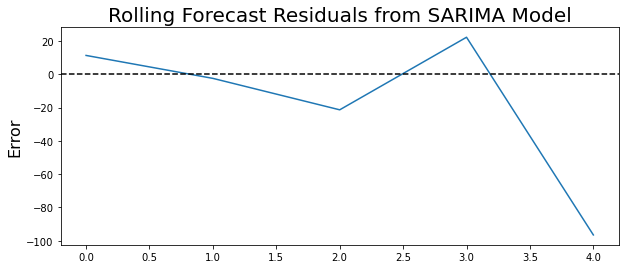

In [83]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Retrying Rolling Forecast Plot...

In [84]:
r_p_d = pd.Series(np.diag(rolling_predictions), index = test_data.index)

Text(0, 0.5, 'TPE')

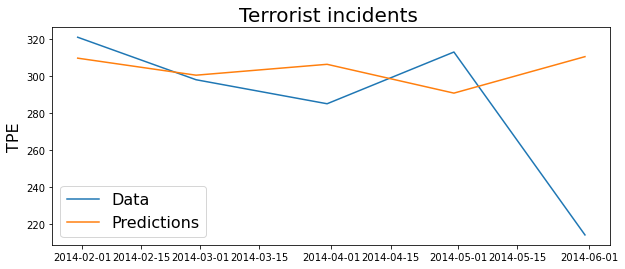

In [86]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(r_p_d)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Terrorist incidents ', fontsize=20)
plt.ylabel('TPE', fontsize=16)

In [ ]:
# We find that we are unable to generate accurate predictions with the data we possess
# at hand

# However, earlier we do notice that the residuals do look rather similar to our data itself
# This could mean that the data is extremely similar to noise, hence it may be possible that
# the people involved aren't affected by the time at which they were involved. 

Trying out GARCH...

In [87]:
import pmdarima
import arch

In [88]:
arima_model = pmdarima.auto_arima(train_data)
p, d, q = arima_model.order
arima_residuals = arima_model.arima_res_.resid

garch = arch.arch_model(arima_residuals, p=3, q=3)
garch_fitted = garch.fit()

predicted_mu = arima_model.predict(n_periods=41)

garch_forecast = garch_fitted.forecast(horizon=2)
predicted_et = garch_forecast.mean['h.1']

Iteration:      1,   Func. Count:     10,   Neg. LLF: 1505.6902787162776
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1021.8393900783306
Iteration:      3,   Func. Count:     32,   Neg. LLF: 925.9951304309554
Iteration:      4,   Func. Count:     41,   Neg. LLF: 925.3300087127482
Iteration:      5,   Func. Count:     50,   Neg. LLF: 925.254772175511
Iteration:      6,   Func. Count:     59,   Neg. LLF: 925.2043017437996
Iteration:      7,   Func. Count:     68,   Neg. LLF: 925.1214803541759
Iteration:      8,   Func. Count:     77,   Neg. LLF: 925.1108486999362
Iteration:      9,   Func. Count:     87,   Neg. LLF: 925.0762966975545
Iteration:     10,   Func. Count:     96,   Neg. LLF: 925.0732905875202
Iteration:     11,   Func. Count:    105,   Neg. LLF: 925.0712565224301
Iteration:     12,   Func. Count:    114,   Neg. LLF: 925.0685992787242
Iteration:     13,   Func. Count:    123,   Neg. LLF: 925.0679199299033
Iteration:     14,   Func. Count:    132,   Neg. LLF: 925.06776

d:\Anaconda\envs\geoenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




<AxesSubplot:>

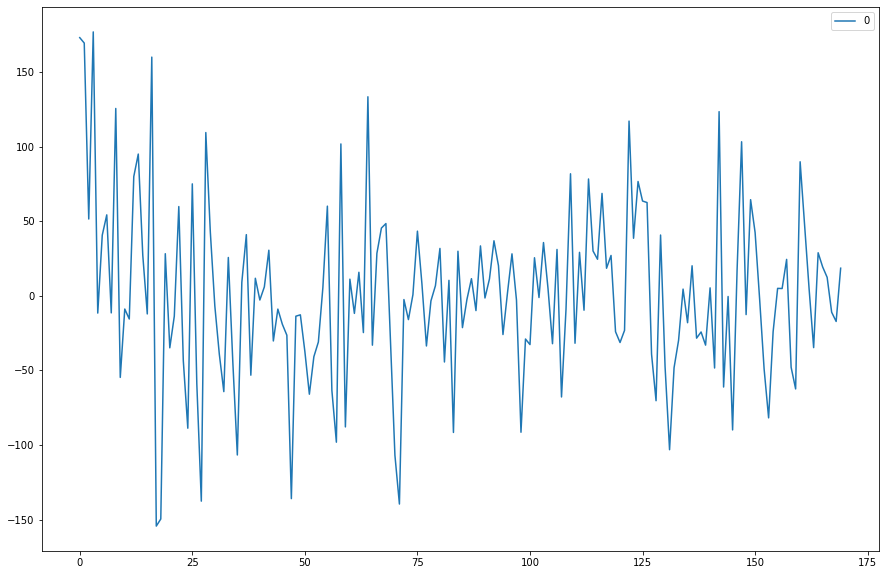

In [89]:
arima_residuals_df = pd.DataFrame(arima_residuals)
arima_residuals_df.plot()

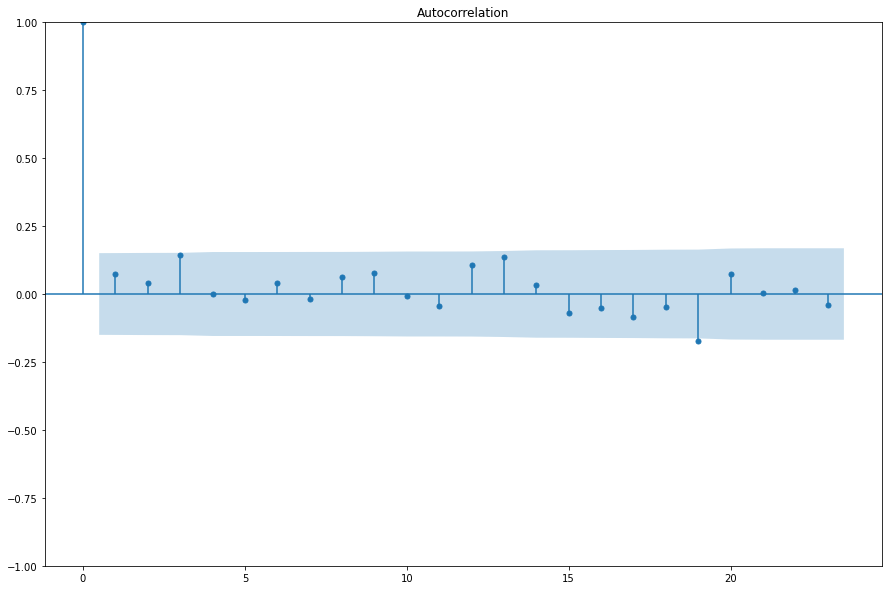

d:\Anaconda\envs\geoenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



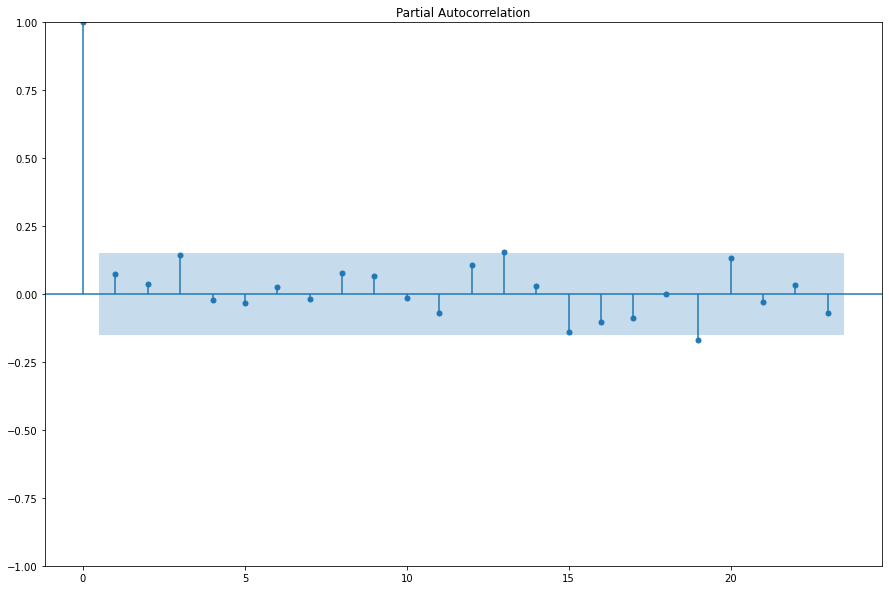

In [90]:
plot_acf(arima_residuals_df)
plt.show()
plot_pacf(arima_residuals_df)
plt.show()

In [91]:
p, d, q

(2, 1, 1)

In [92]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -925.294
Date:                Tue, 14 Jun 2022   AIC                           1858.588
Time:                        16:18:43   BIC                           1871.107
Sample:                             0   HQIC                          1863.668
                                - 170                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2711      0.078      3.457      0.001       0.117       0.425
ar.L2          0.1416      0.087      1.633      0.103      -0.028       0.311
ma.L1         -0.9473      0.036    -25.995      0.000      -1.019      -0.876
sigma2      3305.7355    316.456     10.446      0.000    2685.494    3925.977
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.79   Prob(JB):                         0.19
Heteroskedasticity (H):               0.51   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""